In [6]:
# Import Data Analytics Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS

#ignore error messages
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

<b>Importing the Los Angeles dataset from insideairbnb.com. Data was compiled on 08/07/21. There is a total of 32,240 rows and 75 columns.</b>

In [7]:
# Import Los Angeles Dataset
la_df = pd.read_csv(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\Archived\los_angeles_listingsOG.csv')

#  Add new column called "city_region" and add "Los Angeles" for classification purposes.
la_df['city_region'] = 'Los Angeles'
la_df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city_region
0,109,https://www.airbnb.com/rooms/109,2.021080e+13,8/7/2021,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,...,5.00,4.00,NaN,f,1,1,0,0,0.02,Los Angeles
1,2708,https://www.airbnb.com/rooms/2708,2.021080e+13,8/7/2021,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,...,5.00,4.84,NaN,t,2,0,2,0,0.71,Los Angeles
2,2732,https://www.airbnb.com/rooms/2732,2.021080e+13,8/7/2021,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,...,4.90,4.40,228269,f,2,1,1,0,0.38,Los Angeles
3,2864,https://www.airbnb.com/rooms/2864,2.021080e+13,8/7/2021,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,https://a0.muscache.com/pictures/23817858/de20...,3207,https://www.airbnb.com/users/show/3207,...,NaN,NaN,NaN,t,1,1,0,0,NaN,Los Angeles
4,3021,https://www.airbnb.com/rooms/3021,2.021080e+13,8/7/2021,Hollywood Hills Zen Modern style Apt/Guesthouse,A very Modern Hollywood Hills Zen style galler...,This is the famous Hollywood hills.. Historica...,https://a0.muscache.com/pictures/5147dcd2-efad...,3415,https://www.airbnb.com/users/show/3415,...,4.64,4.00,NaN,f,4,1,3,0,0.41,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32235,51507386,https://www.airbnb.com/rooms/51507386,2.021080e+13,8/7/2021,1920's Modern flat | Los Feliz | 4bd +2ba | views,**This property features a whole house MERV 16...,"This part of leafy Los Feliz is very quiet, pr...",https://a0.muscache.com/pictures/781d311d-3782...,334421116,https://www.airbnb.com/users/show/334421116,...,NaN,NaN,NaN,f,2,2,0,0,NaN,Los Angeles
32236,51508033,https://www.airbnb.com/rooms/51508033,2.021080e+13,8/7/2021,French style 1920 | Los Feliz | 4BD+2BA| Private,This property features a whole house MERV 16 b...,"This part of leafy Los Feliz is very quiet, pr...",https://a0.muscache.com/pictures/573b7212-a0a4...,334421116,https://www.airbnb.com/users/show/334421116,...,NaN,NaN,NaN,f,2,2,0,0,NaN,Los Angeles
32237,51508345,https://www.airbnb.com/rooms/51508345,2.021080e+13,8/7/2021,2 Bedroom great location 632,<b>License number</b><br />Exempt - This listi...,NaN,https://a0.muscache.com/pictures/94a02b4a-ac3e...,20670114,https://www.airbnb.com/users/show/20670114,...,NaN,NaN,Exempt - This listing is a bed and breakfast,f,7,5,2,0,NaN,Los Angeles
32238,51508871,https://www.airbnb.com/rooms/51508871,2.021080e+13,8/7/2021,Westwood Village by UCLA - Parkings Pool Gym Spa,Amazing Location! Within walking distance from...,Very central location in Westwood Village. Rig...,https://a0.muscache.com/pictures/bb9bc706-e485...,138092283,https://www.airbnb.com/users/show/138092283,...,NaN,NaN,Exempt - This listing is a transient occupancy...,f,15,15,0,0,NaN,Los Angeles


<b>Importing the San Diego from insideairbnb.com. The data was compiled on 07/14/21. There is a total of 9,099 rows and 75 columns.</b>

In [8]:
# Import San Diego Dataset
sd_df = pd.read_csv(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\Archived\san_diego_listingsOG.csv')

# Add new column called "city_region" and add "San Diego" for classification purposes.
sd_df['city_region'] = 'San Diego'
sd_df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city_region
0,5570,https://www.airbnb.com/rooms/5570,2.021070e+13,7/14/2021,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,While some may compare San Diego’s Mission Bea...,https://a0.muscache.com/pictures/d3342744-140a...,8435,https://www.airbnb.com/users/show/8435,...,NaN,NaN,NaN,f,3,3,0,0,NaN,San Diego
1,29967,https://www.airbnb.com/rooms/29967,2.021070e+13,7/14/2021,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,...,4.85,4.81,NaN,f,5,5,0,0,0.49,San Diego
2,38245,https://www.airbnb.com/rooms/38245,2.021070e+13,7/15/2021,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,https://www.airbnb.com/users/show/164137,...,4.60,4.39,NaN,f,3,0,3,0,1.46,San Diego
3,54001,https://www.airbnb.com/rooms/54001,2.021070e+13,7/15/2021,"La Jolla Cottage Blocks to Ocn; 2Bdms, 1Bth.","Separate charming cottage behind main home, 2 ...","Tranquility, stately trees, meditative, zen-fu...",https://a0.muscache.com/pictures/47035b04-633c...,252692,https://www.airbnb.com/users/show/252692,...,4.97,4.88,NaN,f,2,1,1,0,5.59,San Diego
4,62274,https://www.airbnb.com/rooms/62274,2.021070e+13,7/15/2021,"charming, colorful, close to beach","Modern, cozy, artsy, and european in a lush ga...","We are in walking distance to Starbucks, Trade...",https://a0.muscache.com/pictures/84577734/93ca...,302986,https://www.airbnb.com/users/show/302986,...,4.87,4.80,NaN,f,2,2,0,0,6.15,San Diego
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9094,51025904,https://www.airbnb.com/rooms/51025904,2.021070e+13,7/14/2021,Studio Space only steps from the beach,This is a small studio in the heart of mission...,NaN,https://a0.muscache.com/pictures/db889d15-55b1...,359922483,https://www.airbnb.com/users/show/359922483,...,NaN,NaN,NaN,f,1,1,0,0,NaN,San Diego
9095,51027262,https://www.airbnb.com/rooms/51027262,2.021070e+13,7/14/2021,Studio with Private Entrance next to Balboa Park,NaN,NaN,https://a0.muscache.com/pictures/af5bbe76-2d46...,408623755,https://www.airbnb.com/users/show/408623755,...,NaN,NaN,NaN,t,35,34,1,0,NaN,San Diego
9096,51033701,https://www.airbnb.com/rooms/51033701,2.021070e+13,7/15/2021,Professionally maintained apt | 2BR in San Diego,Stay for 31+ nights (minimum nights and rates ...,NaN,https://a0.muscache.com/pictures/a4re/floorpla...,368944610,https://www.airbnb.com/users/show/368944610,...,NaN,NaN,NaN,t,12,12,0,0,NaN,San Diego
9097,51034402,https://www.airbnb.com/rooms/51034402,2.021070e+13,7/14/2021,Live + Work + Stay + Easy | 1BR in San Diego,Stay for 30+ nights (minimum nights and rates ...,NaN,https://a0.muscache.com/pictures/a4re/floorpla...,359066913,https://www.airbnb.com/users/show/359066913,...,NaN,NaN,NaN,t,84,84,0,0,NaN,San Diego


<b>Joining the two separate datasets into one combined dataset. New combined dataset has a total of 41,399 rows and 75 columns.</b>

In [9]:
# Join Los Angeles Listings dataset with San Diego Listings dataset. 
df_list = [la_df, sd_df]
la_sd_df = pd.concat(df_list, ignore_index=True)
la_sd_df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city_region
0,109,https://www.airbnb.com/rooms/109,2.021080e+13,8/7/2021,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,...,5.00,4.00,NaN,f,1,1,0,0,0.02,Los Angeles
1,2708,https://www.airbnb.com/rooms/2708,2.021080e+13,8/7/2021,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,...,5.00,4.84,NaN,t,2,0,2,0,0.71,Los Angeles
2,2732,https://www.airbnb.com/rooms/2732,2.021080e+13,8/7/2021,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,...,4.90,4.40,228269,f,2,1,1,0,0.38,Los Angeles
3,2864,https://www.airbnb.com/rooms/2864,2.021080e+13,8/7/2021,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,https://a0.muscache.com/pictures/23817858/de20...,3207,https://www.airbnb.com/users/show/3207,...,NaN,NaN,NaN,t,1,1,0,0,NaN,Los Angeles
4,3021,https://www.airbnb.com/rooms/3021,2.021080e+13,8/7/2021,Hollywood Hills Zen Modern style Apt/Guesthouse,A very Modern Hollywood Hills Zen style galler...,This is the famous Hollywood hills.. Historica...,https://a0.muscache.com/pictures/5147dcd2-efad...,3415,https://www.airbnb.com/users/show/3415,...,4.64,4.00,NaN,f,4,1,3,0,0.41,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41334,51025904,https://www.airbnb.com/rooms/51025904,2.021070e+13,7/14/2021,Studio Space only steps from the beach,This is a small studio in the heart of mission...,NaN,https://a0.muscache.com/pictures/db889d15-55b1...,359922483,https://www.airbnb.com/users/show/359922483,...,NaN,NaN,NaN,f,1,1,0,0,NaN,San Diego
41335,51027262,https://www.airbnb.com/rooms/51027262,2.021070e+13,7/14/2021,Studio with Private Entrance next to Balboa Park,NaN,NaN,https://a0.muscache.com/pictures/af5bbe76-2d46...,408623755,https://www.airbnb.com/users/show/408623755,...,NaN,NaN,NaN,t,35,34,1,0,NaN,San Diego
41336,51033701,https://www.airbnb.com/rooms/51033701,2.021070e+13,7/15/2021,Professionally maintained apt | 2BR in San Diego,Stay for 31+ nights (minimum nights and rates ...,NaN,https://a0.muscache.com/pictures/a4re/floorpla...,368944610,https://www.airbnb.com/users/show/368944610,...,NaN,NaN,NaN,t,12,12,0,0,NaN,San Diego
41337,51034402,https://www.airbnb.com/rooms/51034402,2.021070e+13,7/14/2021,Live + Work + Stay + Easy | 1BR in San Diego,Stay for 30+ nights (minimum nights and rates ...,NaN,https://a0.muscache.com/pictures/a4re/floorpla...,359066913,https://www.airbnb.com/users/show/359066913,...,NaN,NaN,NaN,t,84,84,0,0,NaN,San Diego


<b> Data Cleansing </b>

In [10]:
# Review columns to check data types, Null counts, etc.
la_sd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41339 entries, 0 to 41338
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            41339 non-null  int64  
 1   listing_url                                   41339 non-null  object 
 2   scrape_id                                     41339 non-null  float64
 3   last_scraped                                  41339 non-null  object 
 4   name                                          41337 non-null  object 
 5   description                                   40044 non-null  object 
 6   neighborhood_overview                         26346 non-null  object 
 7   picture_url                                   41339 non-null  object 
 8   host_id                                       41339 non-null  int64  
 9   host_url                                      41339 non-null 

In [11]:
# Pricing amounts in Price column are being treated as strings. Will not be able to analyze properly. 
la_sd_df['price']

0        $115.00 
1         $74.00 
2        $177.00 
3         $50.00 
4        $118.00 
           ...   
41334    $105.00 
41335    $350.00 
41336    $274.00 
41337    $123.00 
41338    $149.00 
Name: price, Length: 41339, dtype: object

<b>Using the Python fuction below to clean the price column. Currency symbol will be removed so the column is not treated as a string. The column will be converted to a float datatype column which will be required for analysis.</b>

In [12]:
# Function to remove $ symbol if the value is a string.  Need to convert to float data type. 

def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [13]:
# Remove $ symbol from values in Price column so I can use describe function on it
la_sd_df['price'] = la_sd_df['price'].apply(clean_currency).astype('float')

# Confirm Price column values were converted to floats.
la_sd_df['price']

0        115.0
1         74.0
2        177.0
3         50.0
4        118.0
         ...  
41334    105.0
41335    350.0
41336    274.0
41337    123.0
41338    149.0
Name: price, Length: 41339, dtype: float64

In [14]:
# Now that Price column has been converted from object dtype to float dtype, use describe function to view pricing statistics.
la_sd_df['price'].describe()

count    41339.000000
mean       279.701783
std        674.116570
min          0.000000
25%         82.000000
50%        140.000000
75%        260.000000
max      25000.000000
Name: price, dtype: float64

<b>When reviewing all 41,339 individual listings the mean price is 279.70 The median price is 140.00, the first quartile is 82.00 and the upper quartile is 260.00</b>

In [15]:
# Remove irrelevant columns that will not be needed for clients' analysis.
la_sd_df_cleaned = la_sd_df.drop(['scrape_id','last_scraped','neighborhood_overview','host_url','host_since',
                            'host_location','host_about','host_response_time','host_response_rate','host_acceptance_rate',
                            'host_is_superhost','host_thumbnail_url','host_picture_url','host_neighbourhood',
                            'host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic',
                            'host_identity_verified','accommodates','bathrooms','bathrooms_text','bedrooms','beds',
                            'amenities','maximum_nights','minimum_minimum_nights','maximum_minimum_nights',
                            'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                            'maximum_nights_avg_ntm','calendar_updated','has_availability','calendar_last_scraped',
                            'first_review','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                            'review_scores_communication','review_scores_value','license','instant_bookable',
                            'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                            'calculated_host_listings_count_shared_rooms'], axis=1)

<b>Cleaned dataset has been reduced to 29 columns.</b>

In [16]:
# Review cleaned dataframe
la_sd_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41339 entries, 0 to 41338
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              41339 non-null  int64  
 1   listing_url                     41339 non-null  object 
 2   name                            41337 non-null  object 
 3   description                     40044 non-null  object 
 4   picture_url                     41339 non-null  object 
 5   host_id                         41339 non-null  int64  
 6   host_name                       41294 non-null  object 
 7   neighbourhood                   26347 non-null  object 
 8   neighbourhood_cleansed          41339 non-null  object 
 9   neighbourhood_group_cleansed    32240 non-null  object 
 10  latitude                        41339 non-null  float64
 11  longitude                       41339 non-null  float64
 12  property_type                   

In [17]:
# Create copy of cleaned dataset so I can return to this one if I make mistakes. 
dataset_modified = la_sd_df_cleaned.copy()

<b>Created a new column called "Revenue_Year" which multiplies the Price column with the number of reviews over the year (number_of_reviews_ltm) column. The dataset does not include revenue for the Airbnb rentals so an assumption is used to calculate the estimated earnings over the year. One could assume that if a person left a review they paid for a rental.</b>

<font color='blue'><b>The dataframe with the new Revenue_Year column has been sorted in descending order.  The top 10 individual listings by highest revenues are shown.  These reflect prices that are in the 99% percentile and brought the hosts the highest amount of revenue.  For example the listing at the Gaslamp Quarter was charging 6,013 dollars had 43 reviews over the year and made an estimated 258,559 dollars as an Airbnb host.  The listing in the Downtown area of Los Angeles is extremely well reviewed and received 749 review over the year and made $160,286.</b></font>

In [109]:
dataset_modified["Revenue_Year"] = dataset_modified["price"] * dataset_modified["number_of_reviews_ltm"]
revenue = dataset_modified[['listing_url','city_region','neighbourhood_cleansed','price','number_of_reviews_ltm', 'Revenue_Year']]
dataset_revenue = revenue.sort_values(by="Revenue_Year", ascending=False).reset_index()

# Displaying the Top 10 rentals with highest revenues
top10_revenue_cities = dataset_revenue.head(11)
top10_revenue_cities

,index,listing_url,city_region,neighbourhood_cleansed,price,number_of_reviews_ltm,Revenue_Year
0,37644,https://www.airbnb.com/rooms/38906513,San Diego,Gaslamp Quarter,6013.0,43,258559.0
1,21287,https://www.airbnb.com/rooms/42140439,Los Angeles,Valley Village,2986.0,78,232908.0
2,21541,https://www.airbnb.com/rooms/42515360,Los Angeles,Downtown,214.0,749,160286.0
3,17373,https://www.airbnb.com/rooms/35835653,Los Angeles,Hollywood Hills West,1900.0,79,150100.0
4,22524,https://www.airbnb.com/rooms/43770721,Los Angeles,Malibu,3450.0,27,93150.0
5,18614,https://www.airbnb.com/rooms/38173193,Los Angeles,Malibu,3450.0,27,93150.0
6,5646,https://www.airbnb.com/rooms/13168316,Los Angeles,Hollywood Hills West,1297.0,69,89493.0
7,38664,https://www.airbnb.com/rooms/43670668,San Diego,Mission Bay,1400.0,63,88200.0
8,20403,https://www.airbnb.com/rooms/40806872,Los Angeles,Chatsworth,1679.0,52,87308.0
9,20213,https://www.airbnb.com/rooms/40487005,Los Angeles,Topanga,1283.0,67,85961.0


In [110]:
# Export modified dataframe to Excel to use in Tableau
top10_revenue_cities.to_excel(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\top10_revenue_cities.xlsx', 
                          index=False)

<b> From reviewing the Null value counts below it becomes clear that there are listings that have never received reviews as well as missing neighbourhoods.  This confirms that using the neighbourhood_cleansed column for categorical purposes is ideal since there are no missing values</b>

In [20]:
# Review count of Null values
dataset_modified.isnull().sum()

id                                    0
listing_url                           0
name                                  2
description                        1295
picture_url                           0
host_id                               0
host_name                            45
neighbourhood                     14992
neighbourhood_cleansed                0
neighbourhood_group_cleansed       9099
latitude                              0
longitude                             0
property_type                         0
room_type                             0
price                                 0
minimum_nights                        0
availability_30                       0
availability_60                       0
availability_90                       0
availability_365                      0
number_of_reviews                     0
number_of_reviews_ltm                 0
number_of_reviews_l30d                0
last_review                        9169
review_scores_rating               9169


In [21]:
# Review unique values for all string data types.
dataset_modified.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

listing_url                     41339
name                            40026
description                     37315
picture_url                     39709
host_name                        8039
neighbourhood                     330
neighbourhood_cleansed            364
neighbourhood_group_cleansed        3
property_type                     117
room_type                           4
last_review                      2079
city_region                         2
dtype: int64

<b> There are 364 unique neighbourhoods/cities in the dataset for Los Angeles and San Diego.  There are 4 different type of room types and 117 unique property types.  Will be more practical to categorize dataset by room type instead of property type.</b>

In [22]:
# Review unique values for all integer data types
dataset_modified.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

id                                41339
host_id                           22375
minimum_nights                      105
availability_30                      31
availability_60                      61
availability_90                      91
availability_365                    366
number_of_reviews                   553
number_of_reviews_ltm               158
number_of_reviews_l30d               23
calculated_host_listings_count       68
dtype: int64

In [23]:
# Review unique values for all float data types
dataset_modified.select_dtypes('float').apply(pd.Series.nunique, axis = 0)

latitude                  26848
longitude                 29331
price                      1602
review_scores_rating        163
review_scores_location      149
reviews_per_month          1550
Revenue_Year               6215
dtype: int64

In [24]:
# Isolate all the integer and float data types.  Create separate dataset for all numerical columns. 
numerical = dataset_modified.select_dtypes(include = ('int64', 'float')).columns
numerical

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_location', 'calculated_host_listings_count',
       'reviews_per_month', 'Revenue_Year'],
      dtype='object')

<b> Using the isolated numerical columns, a for loop is created to see individual KDE plots for each numerical column and see their distributions.  It becomes readily apparent that the price distribution fall mostly between 0 and 1000.  Everything outside of that is a major outlier. </b>
    
<b>The availabilities appears to follow a pattern where it peaks between 1 and 2 days, then levels out and finally has a secondary peak towards the end of the availability period (e.g. 30, 60, 90, 365 days).  </b>    

<b> The distributions of the number of reviews is much lower than assumed. The IQR (25 - 75 percent) of total reviews is between 1-40, 1-9 reviews per year, or 1 review every 30 days. </b>

<b> The review scores on the other hand are a lot higher than anticipated.  Nearly all review rating scores are between 4-5, with 4.8 or 4.9 being the most frequent score for overall rating and location ratings </b>

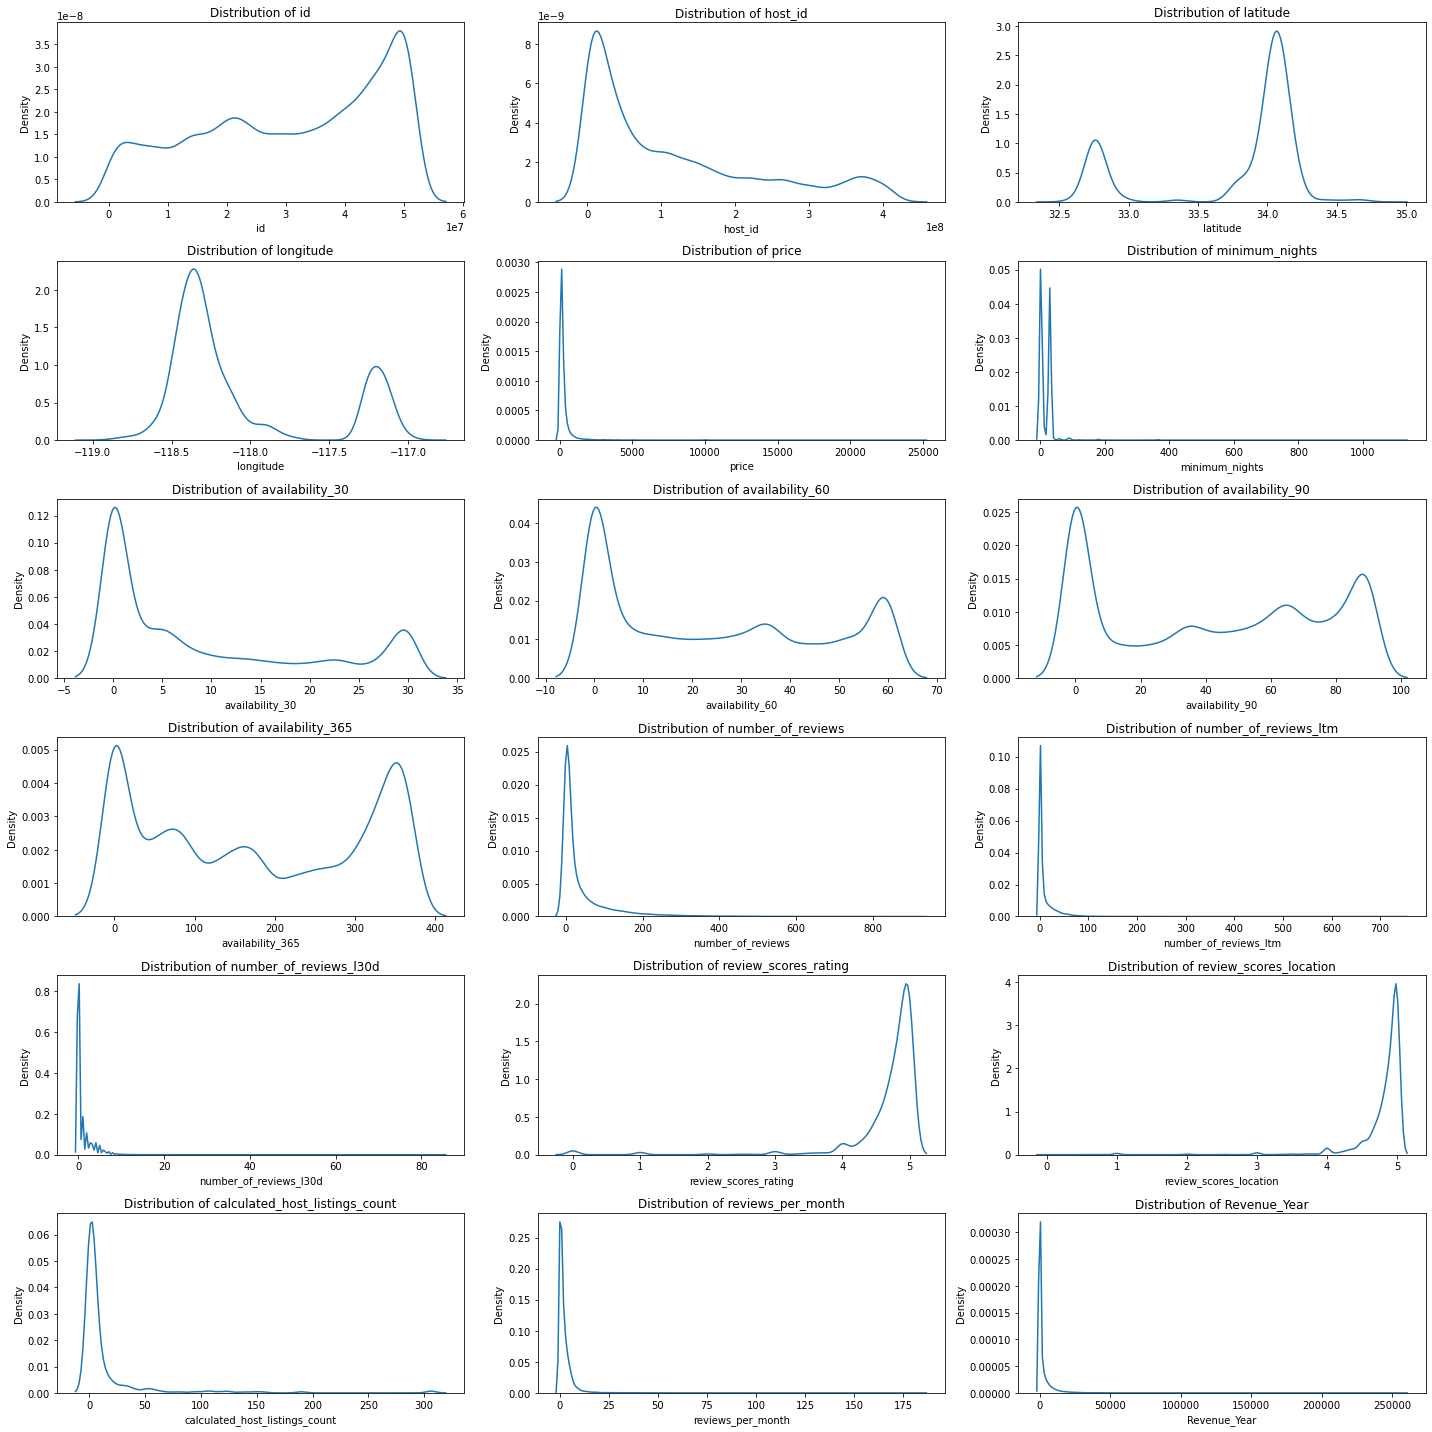

In [25]:
# Review distributions of all the numerical columns to identify trends and outliers.
plt.figure(figsize=(20,20))

for i, feature in enumerate(numerical):
    plt.subplot(6,3,i+1)
    sns.kdeplot(dataset_modified[feature])
    plt.title('Distribution of %s' %feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density')
    plt.tight_layout()

<b>Describe trends seen in graphs</b>

In [26]:
dataset_modified[['price', 'minimum_nights','number_of_reviews', 'number_of_reviews_ltm','number_of_reviews_l30d', 
                  'review_scores_rating','review_scores_location','calculated_host_listings_count','reviews_per_month', 
                  'Revenue_Year']].describe()

,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_location,calculated_host_listings_count,reviews_per_month,Revenue_Year
count,41339.000000,41339.000000,41339.000000,41339.000000,41339.000000,32170.000000,31774.000000,41339.000000,32170.000000,41339.000000
mean,279.701783,17.253151,38.029415,8.750744,0.950144,4.682635,4.813944,13.869832,2.377709,2082.772588
std,674.116570,31.910913,71.826689,17.820366,1.888430,0.662418,0.379207,36.904097,4.917136,5559.954244
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000
25%,82.000000,2.000000,1.000000,0.000000,0.000000,4.670000,4.790000,1.000000,0.290000,0.000000
50%,140.000000,5.000000,8.000000,1.000000,0.000000,4.860000,4.920000,2.000000,1.010000,135.000000
75%,260.000000,30.000000,41.000000,9.000000,1.000000,5.000000,5.000000,8.000000,2.890000,1639.000000
max,25000.000000,1125.000000,915.000000,749.000000,85.000000,5.000000,5.000000,306.000000,185.000000,258559.000000


In [27]:
dataset_modified[['availability_30', 'availability_60', 'availability_90','availability_365']].describe()

,availability_30,availability_60,availability_90,availability_365
count,41339.000000,41339.000000,41339.000000,41339.000000
mean,9.157333,24.766298,43.025811,174.900530
std,10.737080,21.914681,33.210457,135.537403
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000,43.000000
50%,4.000000,22.000000,45.000000,161.000000
75%,17.000000,45.000000,74.000000,320.000000
max,30.000000,60.000000,90.000000,365.000000


<b>First decision tree will split dataframe by Los Angeles and San Diego rentals. Boxplot below is difficult to decipher since there are numerous outliers.</b>

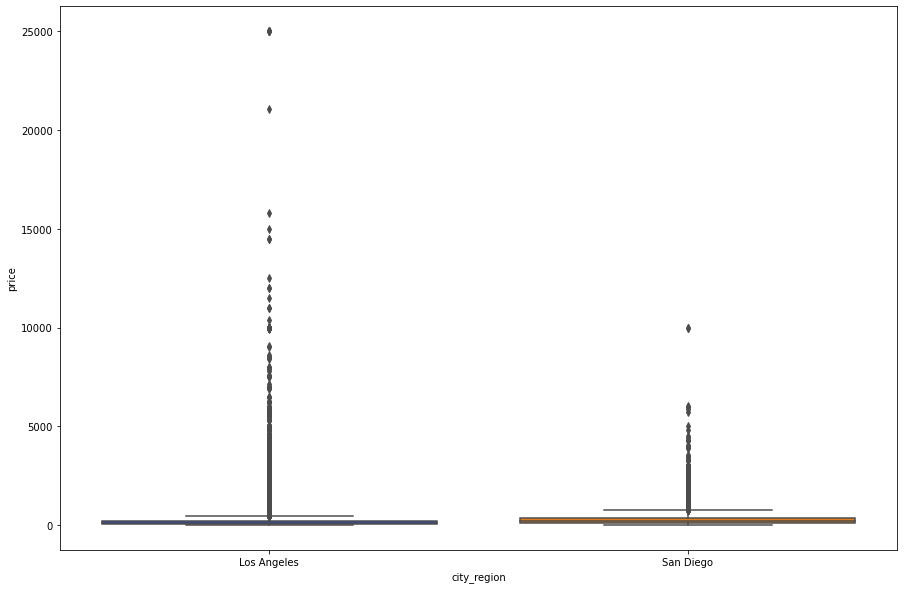

In [28]:
# Compare San Diego and Los Angeles price distributions.  
plt.figure(figsize = (15,10))
box_plot = sns.boxplot(x='city_region', y='price',
                      data=dataset_modified,
                      palette="bright")

<b> Various quantiles from the 5th percentile up to the 99.7th perecentile are used to analyze the prices for both Los Angeles and San Diego</b>

<b> San Diego tends to have higher prices overall with the exception of rentals that fall above the 99.7th percentile which are two times more expensive than San Diego. </b>

In [29]:
# Create separate dataframes filterd by San Diego and Los Angeles cities.
San_Diego_Filter = dataset_modified.loc[dataset_modified.city_region == 'San Diego']
Los_Angeles_Filter = dataset_modified.loc[dataset_modified.city_region == 'Los Angeles']

In [30]:
print("5 Percentile -", Los_Angeles_Filter[['price']].quantile(.05))
print("10 Percentile -", Los_Angeles_Filter[['price']].quantile(.1))
print("25 Percentile -",Los_Angeles_Filter[['price']].quantile(.25))
print("50 Percentile -",Los_Angeles_Filter[['price']].quantile(.5))
print("75 Percentile -",Los_Angeles_Filter[['price']].quantile(.75))
print("90 Percentile -",Los_Angeles_Filter[['price']].quantile(.9))
print("95 Percentile -",Los_Angeles_Filter[['price']].quantile(.95))
print("99.7 Percentile -",Los_Angeles_Filter[['price']].quantile(.997))

5 Percentile - price    40.0
Name: 0.05, dtype: float64
10 Percentile - price    50.0
Name: 0.1, dtype: float64
25 Percentile - price    75.75
Name: 0.25, dtype: float64
50 Percentile - price    125.0
Name: 0.5, dtype: float64
75 Percentile - price    226.0
Name: 0.75, dtype: float64
90 Percentile - price    450.0
Name: 0.9, dtype: float64
95 Percentile - price    779.0
Name: 0.95, dtype: float64
99.7 Percentile - price    6000.0
Name: 0.997, dtype: float64


In [31]:
print("5 Percentile -", San_Diego_Filter[['price']].quantile(.05))
print("10 Percentile -", San_Diego_Filter[['price']].quantile(.1))
print("25 Percentile -",San_Diego_Filter[['price']].quantile(.25))
print("50 Percentile -",San_Diego_Filter[['price']].quantile(.5))
print("75 Percentile -",San_Diego_Filter[['price']].quantile(.75))
print("90 Percentile -",San_Diego_Filter[['price']].quantile(.9))
print("95 Percentile -",San_Diego_Filter[['price']].quantile(.95))
print("99.7 Percentile -",San_Diego_Filter[['price']].quantile(.997))

5 Percentile - price    55.0
Name: 0.05, dtype: float64
10 Percentile - price    75.0
Name: 0.1, dtype: float64
25 Percentile - price    120.0
Name: 0.25, dtype: float64
50 Percentile - price    200.0
Name: 0.5, dtype: float64
75 Percentile - price    385.0
Name: 0.75, dtype: float64
90 Percentile - price    699.0
Name: 0.9, dtype: float64
95 Percentile - price    974.1
Name: 0.95, dtype: float64
99.7 Percentile - price    3000.0
Name: 0.997, dtype: float64


<b> Using the quantiles above, prices above $1000 will be filtered out which accounts for prices above the 95th percentile.</b>

<b> After filtering out all ads over $1000, the remaining number of rows is 39,707. </b>

In [32]:
# Filter to prices under $1000 which removes prices above the 95 percentile
under1000_dataframe = dataset_modified.loc[dataset_modified.price < 1000]
under1000_dataframe

,id,listing_url,name,description,picture_url,host_id,host_name,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_location,calculated_host_listings_count,reviews_per_month,city_region,Revenue_Year
0,109,https://www.airbnb.com/rooms/109,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",https://a0.muscache.com/pictures/4321499/1da98...,521,Paolo,NaN,Culver City,Other Cities,...,2,0,0,5/15/2016,4.00,5.00,1,0.02,Los Angeles,0.0
1,2708,https://www.airbnb.com/rooms/2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,Chas.,"Los Angeles, California, United States",Hollywood,City of Los Angeles,...,31,5,1,6/19/2021,4.84,5.00,2,0.71,Los Angeles,370.0
2,2732,https://www.airbnb.com/rooms/2732,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,https://a0.muscache.com/pictures/1082974/0f74c...,3041,Yoga Priestess,"Santa Monica, California, United States",Santa Monica,Other Cities,...,21,0,0,12/27/2019,4.68,4.90,2,0.38,Los Angeles,0.0
3,2864,https://www.airbnb.com/rooms/2864,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,https://a0.muscache.com/pictures/23817858/de20...,3207,Bernadine,"Bellflower, California, United States",Bellflower,Other Cities,...,0,0,0,NaN,NaN,NaN,1,NaN,Los Angeles,0.0
4,3021,https://www.airbnb.com/rooms/3021,Hollywood Hills Zen Modern style Apt/Guesthouse,A very Modern Hollywood Hills Zen style galler...,https://a0.muscache.com/pictures/5147dcd2-efad...,3415,Nataraj,"Los Angeles, California, United States",Hollywood Hills West,City of Los Angeles,...,23,0,0,10/31/2018,4.04,4.64,4,0.41,Los Angeles,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41334,51025904,https://www.airbnb.com/rooms/51025904,Studio Space only steps from the beach,This is a small studio in the heart of mission...,https://a0.muscache.com/pictures/db889d15-55b1...,359922483,Joshua,NaN,Mission Bay,NaN,...,0,0,0,NaN,NaN,NaN,1,NaN,San Diego,0.0
41335,51027262,https://www.airbnb.com/rooms/51027262,Studio with Private Entrance next to Balboa Park,NaN,https://a0.muscache.com/pictures/af5bbe76-2d46...,408623755,Fir,NaN,Park West,NaN,...,0,0,0,NaN,NaN,NaN,35,NaN,San Diego,0.0
41336,51033701,https://www.airbnb.com/rooms/51033701,Professionally maintained apt | 2BR in San Diego,Stay for 31+ nights (minimum nights and rates ...,https://a0.muscache.com/pictures/a4re/floorpla...,368944610,Carolyn,NaN,East Village,NaN,...,0,0,0,NaN,NaN,NaN,12,NaN,San Diego,0.0
41337,51034402,https://www.airbnb.com/rooms/51034402,Live + Work + Stay + Easy | 1BR in San Diego,Stay for 30+ nights (minimum nights and rates ...,https://a0.muscache.com/pictures/a4re/floorpla...,359066913,Kia,NaN,East Village,NaN,...,0,0,0,NaN,NaN,NaN,84,NaN,San Diego,0.0


In [33]:
# Export modified dataframe to Excel to use in Tableau
dataset_modified.to_excel(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\dataset_modified.xlsx', 
                          index=False)

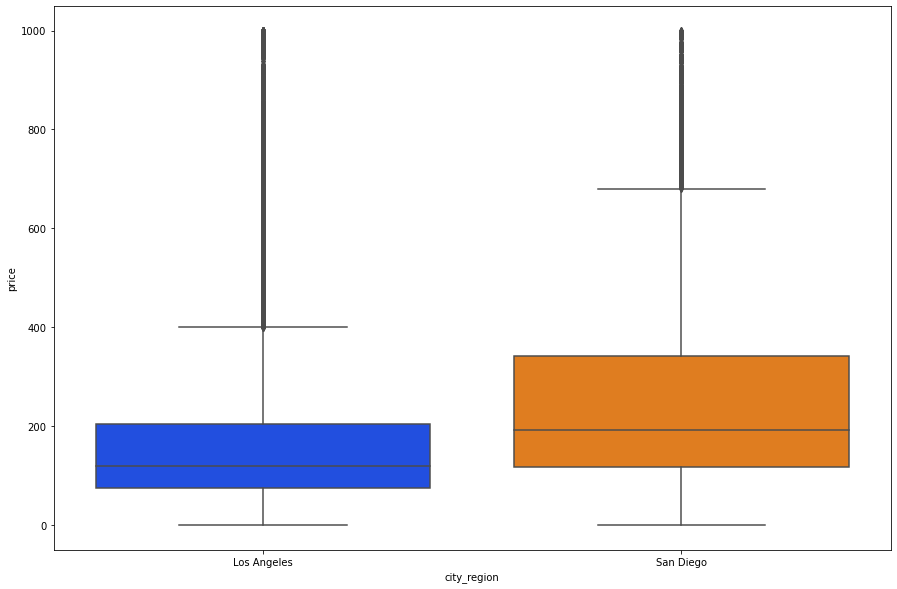

In [34]:
# Boxplot with prices over the 95th percentile removed.

plt.figure(figsize = (15,10))
box_plot = sns.boxplot(x='city_region', y='price',
                      data=under1000_dataframe,
                      palette="bright")

<b>After removing extreme outliers and creating a second boxplot it is clear that San Diego has higher rental prices than Los Angeles.  However Los Angeles has much more outliers than San Diego.</b>

In [35]:
# Dataframe created for all San Diego rentals under 1000.  Median price is 193 and mean price is 261
under1000_SD_dataframe = San_Diego_Filter.loc[San_Diego_Filter.price < 1000]
under1000_SD_dataframe['price'].describe()

count    8666.000000
mean      261.034849
std       202.544728
min         0.000000
25%       118.000000
50%       193.000000
75%       343.000000
max       999.000000
Name: price, dtype: float64

In [36]:
# Dataframe created for all Los Angeles rentals under 1000.  Median price is 120 and mean price is 173
under1000_LA_dataframe = Los_Angeles_Filter.loc[Los_Angeles_Filter.price < 1000]
under1000_LA_dataframe['price'].describe()

count    31041.000000
mean       172.923488
std        156.436079
min          0.000000
25%         75.000000
50%        120.000000
75%        205.000000
max        999.000000
Name: price, dtype: float64

<b> Next decision tree will split rentals by room type.  San Diego rentals for the Entire Home, Private Room, Hotel Room, and Shared Room are shown below. As expected the Entire Home have higher prices on average compared to the Other Room types. <b>

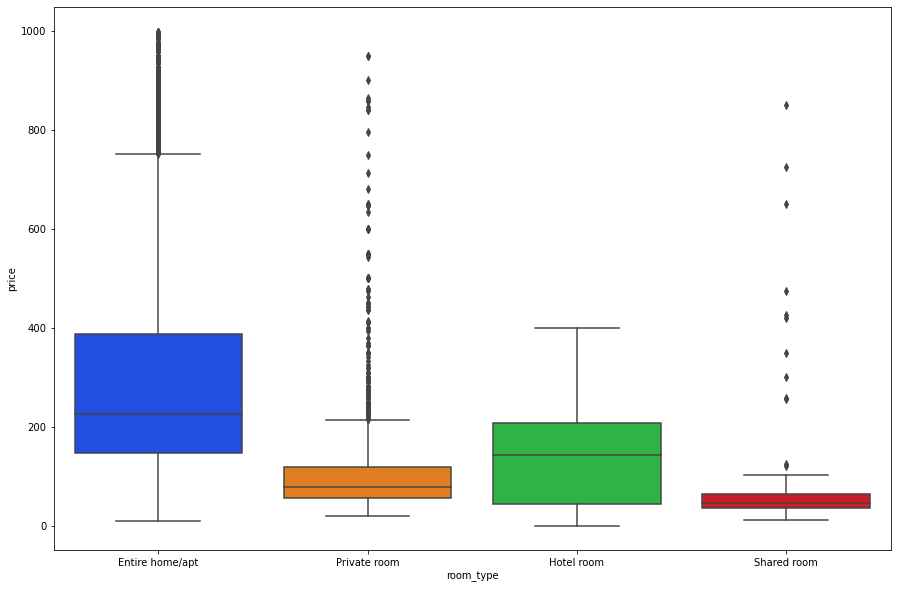

In [37]:
# Compare the price of San Diego rentals by room type.  As expected the "Entire home/apt" charge higher prices on rentals than private rooms, shared rooms, and even hotel rooms.    
plt.figure(figsize = (15,10))
box_plot = sns.boxplot(x='room_type', y='price',
                      data=under1000_SD_dataframe,
                      palette="bright")

<b>Compare the price of Los Angeles rentals by room type. As expected the "Entire home/apt" charge higher prices on rentals than private rooms, shared rooms, and even hotel rooms. However in comparison to San Diego the prices of entire homes/apartments are only slightly higher than hotel rooms in Los Angeles. There is more of a dramatic difference in San Diego.</b>

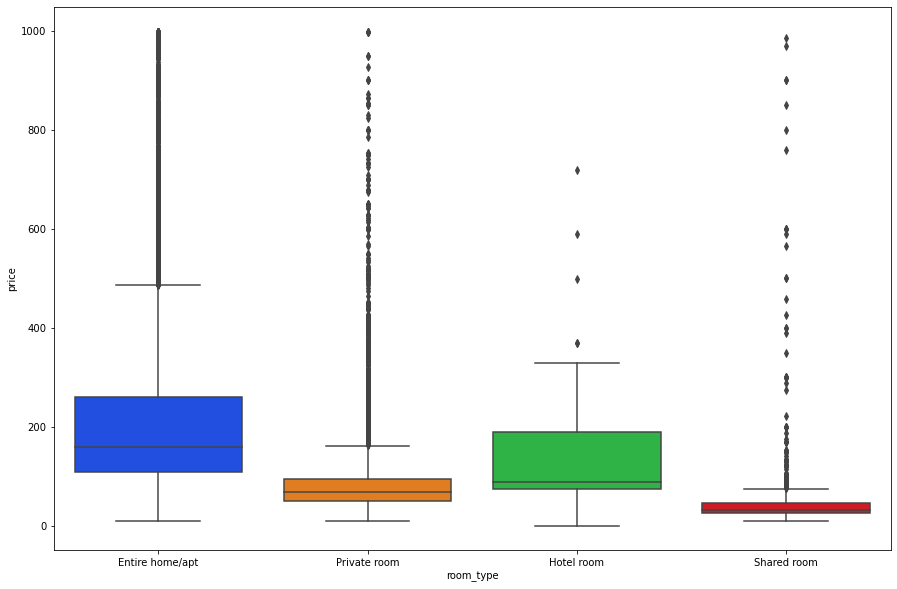

In [38]:
# Compare the price of Los Angeles rentals by room type.  As expected the "Entire home/apt" charge higher prices on rentals than private rooms, shared rooms, and even hotel rooms.
plt.figure(figsize = (15,10))
box_plot = sns.boxplot(x='room_type', y='price',
                      data=under1000_LA_dataframe,
                      palette="bright")

<b> Creating various dataframes to further analyze data.  Will split up San Diego by Entire Homes and Other Room Types.  Will complete same action for Los Angeles </b>

<b> San Diego - Entire Homes Dataset</b>

<b> 7037 listings <b>

In [39]:
# Filter San Diego dataset to entire home/apt rentals only.
san_diego_entire_home = under1000_SD_dataframe[under1000_SD_dataframe.room_type == 'Entire home/apt'].reset_index()
san_diego_entire_home

,index,id,listing_url,name,description,picture_url,host_id,host_name,neighbourhood,neighbourhood_cleansed,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_location,calculated_host_listings_count,reviews_per_month,city_region,Revenue_Year
0,32241,29967,https://www.airbnb.com/rooms/29967,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",https://a0.muscache.com/pictures/76103867/c9b5...,129123,Michael,NaN,Pacific Beach,...,66,6,1,6/30/2021,4.85,4.85,5,0.49,San Diego,1452.0
1,32243,54001,https://www.airbnb.com/rooms/54001,"La Jolla Cottage Blocks to Ocn; 2Bdms, 1Bth.","Separate charming cottage behind main home, 2 ...",https://a0.muscache.com/pictures/47035b04-633c...,252692,Marsha,"La Jolla, California, United States",La Jolla,...,264,41,5,7/11/2021,4.94,4.97,2,5.59,San Diego,6847.0
2,32244,62274,https://www.airbnb.com/rooms/62274,"charming, colorful, close to beach","Modern, cozy, artsy, and european in a lush ga...",https://a0.muscache.com/pictures/84577734/93ca...,302986,Isabel,"San Diego, California, United States",Pacific Beach,...,659,75,4,6/27/2021,4.77,4.87,2,6.15,San Diego,6225.0
3,32245,62949,https://www.airbnb.com/rooms/62949,Pacific Beach Cozy Private Hideaway Bikes Incl...,Wonderful Cozy Private Retreat. Included are b...,https://a0.muscache.com/pictures/f5d54435-d02a...,21532,Lisa,"San Diego, California, United States",Pacific Beach,...,784,118,9,7/11/2021,4.85,4.81,2,9.74,San Diego,11092.0
4,32246,67441,https://www.airbnb.com/rooms/67441,Canyon apartment hideaway,This recently renovated apartment looks out to...,https://a0.muscache.com/pictures/74774127/661b...,332552,Peter,"San Diego, California, United States",College Area,...,5,2,0,5/31/2021,5.00,5.00,5,0.07,San Diego,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,41334,51025904,https://www.airbnb.com/rooms/51025904,Studio Space only steps from the beach,This is a small studio in the heart of mission...,https://a0.muscache.com/pictures/db889d15-55b1...,359922483,Joshua,NaN,Mission Bay,...,0,0,0,NaN,NaN,NaN,1,NaN,San Diego,0.0
7033,41335,51027262,https://www.airbnb.com/rooms/51027262,Studio with Private Entrance next to Balboa Park,NaN,https://a0.muscache.com/pictures/af5bbe76-2d46...,408623755,Fir,NaN,Park West,...,0,0,0,NaN,NaN,NaN,35,NaN,San Diego,0.0
7034,41336,51033701,https://www.airbnb.com/rooms/51033701,Professionally maintained apt | 2BR in San Diego,Stay for 31+ nights (minimum nights and rates ...,https://a0.muscache.com/pictures/a4re/floorpla...,368944610,Carolyn,NaN,East Village,...,0,0,0,NaN,NaN,NaN,12,NaN,San Diego,0.0
7035,41337,51034402,https://www.airbnb.com/rooms/51034402,Live + Work + Stay + Easy | 1BR in San Diego,Stay for 30+ nights (minimum nights and rates ...,https://a0.muscache.com/pictures/a4re/floorpla...,359066913,Kia,NaN,East Village,...,0,0,0,NaN,NaN,NaN,84,NaN,San Diego,0.0


In [112]:
# Export modified dataframe to Excel to use in Tableau
san_diego_entire_home.to_excel(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\san_diego_entire_home.xlsx', 
                          index=False)

<b> San Diego - Other Room Type Dataset </b>

<b> 1629 listings </b>

In [40]:
# Filter dataset to all "Other" room type rentals
san_diego_other_room_type = under1000_SD_dataframe[under1000_SD_dataframe['room_type'].isin
                                                   (['Private room','Hotel room', 'Shared room'])].reset_index()
san_diego_other_room_type

,index,id,listing_url,name,description,picture_url,host_id,host_name,neighbourhood,neighbourhood_cleansed,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_location,calculated_host_listings_count,reviews_per_month,city_region,Revenue_Year
0,32242,38245,https://www.airbnb.com/rooms/38245,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,https://a0.muscache.com/pictures/f3073822-e493...,164137,Melinda,"San Diego, California, United States",Roseville,...,143,0,0,10/20/2019,4.30,4.60,3,1.46,San Diego,0.0
1,32248,75668,https://www.airbnb.com/rooms/75668,San Diego Living by JA 2,<b>The space</b><br />Medium large bedroom wit...,https://a0.muscache.com/pictures/555077/d489e7...,401936,Johnathon,NaN,North Hills,...,195,2,0,9/30/2020,4.83,4.80,2,2.32,San Diego,90.0
2,32249,77785,https://www.airbnb.com/rooms/77785,"Ideal for Work, Med Students, Grad Students",Old Town San Diego. Great location and ambian...,https://a0.muscache.com/pictures/96dba9ec-5f74...,417659,Alicia,"San Diego, California, United States",Old Town,...,17,1,0,10/16/2020,4.82,5.00,1,0.44,San Diego,72.0
3,32250,79300,https://www.airbnb.com/rooms/79300,San Diego living by JA 1,<b>The space</b><br />This is very large room ...,https://a0.muscache.com/pictures/555118/c82be6...,401936,Johnathon,NaN,North Hills,...,158,5,1,6/21/2021,4.81,4.77,2,2.40,San Diego,250.0
4,32251,103417,https://www.airbnb.com/rooms/103417,"La Jolla Retreat-Zen Lifestyle, More than a Room","Located on a magical, tree-lined street akin t...",https://a0.muscache.com/pictures/9261daaf-762e...,252692,Marsha,"La Jolla , California, United States",La Jolla,...,225,17,2,7/10/2021,4.92,4.94,2,5.73,San Diego,2091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,41293,50937769,https://www.airbnb.com/rooms/50937769,"Bounty#4 Prive-bedroom, shared bath-SDSU/Del C...",A space comfortable bedroom & shared bath with...,https://a0.muscache.com/pictures/d7ca76bf-71cd...,152506197,Lucie,"San Diego, California, United States",Del Cerro,...,0,0,0,NaN,NaN,NaN,9,NaN,San Diego,0.0
1625,41299,50941923,https://www.airbnb.com/rooms/50941923,Estudio cómodo y amplio,Desde este alojamiento céntrico todo el grupo ...,https://a0.muscache.com/pictures/1af36a12-1d2b...,170131957,Alberto,NaN,Tijuana River Valley,...,0,0,0,NaN,NaN,NaN,1,NaN,San Diego,0.0
1626,41311,50978525,https://www.airbnb.com/rooms/50978525,Nice bedroom with private bathroom in La Jolla,<b>The space</b><br />You will have access to ...,https://a0.muscache.com/pictures/31a6d38d-2675...,65252317,Clara,NaN,University City,...,0,0,0,NaN,NaN,NaN,1,NaN,San Diego,0.0
1627,41320,50999621,https://www.airbnb.com/rooms/50999621,Comfy private room and bathroom in San Diego,You will be close to everything when you stay ...,https://a0.muscache.com/pictures/5bd32419-eeac...,404987749,Kinnedy,NaN,Gateway,...,0,0,0,NaN,NaN,NaN,1,NaN,San Diego,0.0


<b> Los Angeles - Entire Home Dataset</b>

<b> 20596 listings </b>

In [41]:
# Filter Los Angeles dataset to entire home/apt rentals only.
los_angeles_entire_home = under1000_LA_dataframe[under1000_LA_dataframe.room_type == 'Entire home/apt'].reset_index()
los_angeles_entire_home

,index,id,listing_url,name,description,picture_url,host_id,host_name,neighbourhood,neighbourhood_cleansed,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_location,calculated_host_listings_count,reviews_per_month,city_region,Revenue_Year
0,0,109,https://www.airbnb.com/rooms/109,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",https://a0.muscache.com/pictures/4321499/1da98...,521,Paolo,NaN,Culver City,...,2,0,0,5/15/2016,4.00,5.00,1,0.02,Los Angeles,0.0
1,3,2864,https://www.airbnb.com/rooms/2864,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,https://a0.muscache.com/pictures/23817858/de20...,3207,Bernadine,"Bellflower, California, United States",Bellflower,...,0,0,0,NaN,NaN,NaN,1,NaN,Los Angeles,0.0
2,4,3021,https://www.airbnb.com/rooms/3021,Hollywood Hills Zen Modern style Apt/Guesthouse,A very Modern Hollywood Hills Zen style galler...,https://a0.muscache.com/pictures/5147dcd2-efad...,3415,Nataraj,"Los Angeles, California, United States",Hollywood Hills West,...,23,0,0,10/31/2018,4.04,4.64,4,0.41,Los Angeles,0.0
3,7,5843,https://www.airbnb.com/rooms/5843,Artist Oasis near Venice Beach w/ Beautiful Ga...,Do you want a taste of Paradise?<br />Our one-...,https://a0.muscache.com/pictures/25d657aa-2529...,9171,Sanni,"Los Angeles, California, United States",Del Rey,...,128,1,0,8/22/2020,4.63,4.75,4,1.04,Los Angeles,130.0
4,10,7992,https://www.airbnb.com/rooms/7992,"Quiet,Walkable Area/Sanitized/CozySpot","Hello, Traveler. This is not a party house. ...",https://a0.muscache.com/pictures/miso/Hosting-...,22363,Tom,"Los Angeles, California, United States",Atwater Village,...,246,6,2,7/9/2021,4.94,4.94,2,4.12,Los Angeles,714.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,32235,51507386,https://www.airbnb.com/rooms/51507386,1920's Modern flat | Los Feliz | 4bd +2ba | views,**This property features a whole house MERV 16...,https://a0.muscache.com/pictures/781d311d-3782...,334421116,Infinite,"Los Angeles, California, United States",Downtown,...,0,0,0,NaN,NaN,NaN,2,NaN,Los Angeles,0.0
20592,32236,51508033,https://www.airbnb.com/rooms/51508033,French style 1920 | Los Feliz | 4BD+2BA| Private,This property features a whole house MERV 16 b...,https://a0.muscache.com/pictures/573b7212-a0a4...,334421116,Infinite,"Los Angeles, California, United States",Los Feliz,...,0,0,0,NaN,NaN,NaN,2,NaN,Los Angeles,0.0
20593,32237,51508345,https://www.airbnb.com/rooms/51508345,2 Bedroom great location 632,<b>License number</b><br />Exempt - This listi...,https://a0.muscache.com/pictures/94a02b4a-ac3e...,20670114,Sarah,NaN,Beverly Grove,...,0,0,0,NaN,NaN,NaN,7,NaN,Los Angeles,0.0
20594,32238,51508871,https://www.airbnb.com/rooms/51508871,Westwood Village by UCLA - Parkings Pool Gym Spa,Amazing Location! Within walking distance from...,https://a0.muscache.com/pictures/bb9bc706-e485...,138092283,Shawn,"Los Angeles, California, United States",Westwood,...,0,0,0,NaN,NaN,NaN,15,NaN,Los Angeles,0.0


In [111]:
# Export modified dataframe to Excel to use in Tableau
los_angeles_entire_home.to_excel(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\los_angeles_entire_home.xlsx', 
                          index=False)

<b> Los Angeles - Other Room Type Dataset </b>

<b> 10445 listings </b>

In [42]:
# Filter Los Angeles dataset to all "Other" room type rentals
los_angeles_other_room_type = under1000_LA_dataframe[under1000_LA_dataframe['room_type'].isin
                                                   (['Private room','Hotel room', 'Shared room'])].reset_index()
los_angeles_other_room_type

,index,id,listing_url,name,description,picture_url,host_id,host_name,neighbourhood,neighbourhood_cleansed,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_location,calculated_host_listings_count,reviews_per_month,city_region,Revenue_Year
0,1,2708,https://www.airbnb.com/rooms/2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,Chas.,"Los Angeles, California, United States",Hollywood,...,31,5,1,6/19/2021,4.84,5.00,2,0.71,Los Angeles,370.0
1,2,2732,https://www.airbnb.com/rooms/2732,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,https://a0.muscache.com/pictures/1082974/0f74c...,3041,Yoga Priestess,"Santa Monica, California, United States",Santa Monica,...,21,0,0,12/27/2019,4.68,4.90,2,0.38,Los Angeles,0.0
2,5,5728,https://www.airbnb.com/rooms/5728,Tiny Home in Artistic Oasis near Venice and LAX,Our home is located near Venice Beach without ...,https://a0.muscache.com/pictures/7a29d275-f293...,9171,Sanni,"Los Angeles, California, United States",Del Rey,...,311,1,1,7/31/2021,4.79,4.79,4,4.49,Los Angeles,50.0
3,6,5729,https://www.airbnb.com/rooms/5729,Zen Room with Floating Bed near Venice and LAX,Our home is located near Venice Beach without ...,https://a0.muscache.com/pictures/f48e3ea8-2075...,9171,Sanni,"Los Angeles, California, United States",Del Rey,...,232,2,0,6/16/2021,4.76,4.76,4,4.84,Los Angeles,130.0
4,8,6931,https://www.airbnb.com/rooms/6931,Run Runyon | Beau Furn Rm Dres Rm/Walk-In Clst...,Runyon Canyon.<br /><br />Gym & Sauna Now Open...,https://a0.muscache.com/pictures/37075299/eb4b...,3008,Chas.,"Los Angeles, California, United States",Hollywood,...,28,7,0,4/21/2021,4.80,4.79,2,1.17,Los Angeles,602.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440,32228,51506169,https://www.airbnb.com/rooms/51506169,"Adorable BR near LAX , forum 15 min from Beach",NaN,https://a0.muscache.com/pictures/3a5c784f-9287...,145436929,Dora,NaN,Inglewood,...,0,0,0,NaN,NaN,NaN,7,NaN,Los Angeles,0.0
10441,32230,51506440,https://www.airbnb.com/rooms/51506440,A Beautiful Tropical Paradise Suite In A Mansion,Your own private oasis in LA awaits in this Tr...,https://a0.muscache.com/pictures/569f042c-37dd...,144214204,Jino & Scott,"Los Angeles, California, United States",Sherman Oaks,...,0,0,0,NaN,NaN,NaN,155,NaN,Los Angeles,0.0
10442,32232,51506605,https://www.airbnb.com/rooms/51506605,A Beautiful Beach Paradise Suite In A Mansion,Your fun adventure in LA awaits in this beauti...,https://a0.muscache.com/pictures/f0a30f76-6e7e...,144214204,Jino & Scott,"Los Angeles, California, United States",Sherman Oaks,...,0,0,0,NaN,NaN,NaN,155,NaN,Los Angeles,0.0
10443,32233,51506701,https://www.airbnb.com/rooms/51506701,Shabby Chic Comfort,420 Friendly. Private comfy room located in ve...,https://a0.muscache.com/pictures/9d531f51-31b8...,270425588,LaVon,NaN,Mid-Wilshire,...,0,0,0,NaN,NaN,NaN,1,NaN,Los Angeles,0.0


<b><font color='blue'> Using the 4 individual dataframes created above, each dataframe will be grouped by median price to view which cities/neighborhoods are charging the highest rental prices</b></font>

<b> Group San Diego - Entire Home dataframe by median price</b>

<b> San Diego - Entire Home by Price </b>

<b> 100 Cities/Neighborhoods </b> 

In [43]:
groupbyprice_SD_entirehome = san_diego_entire_home.groupby(['city_region',
                                                            'neighbourhood_cleansed'])['price'].median().reset_index()
sortedgroupprice_SD_entirehome = groupbyprice_SD_entirehome.sort_values(by="price", ascending=False).reset_index()
sortedgroupprice_SD_entirehome

,index,city_region,neighbourhood_cleansed,price
0,83,San Diego,Sky Line,800.0
1,60,San Diego,North City,580.5
2,90,San Diego,Terra Nova,507.5
3,74,San Diego,Rancho Del Rey,440.0
4,81,San Diego,Scripps Ranch,410.0
...,...,...,...,...
95,25,San Diego,Eastlake Vistas,71.5
96,92,San Diego,Tijuana River Valley,71.0
97,43,San Diego,Lincoln Park,67.0
98,99,San Diego,Yosemite Dr,67.0


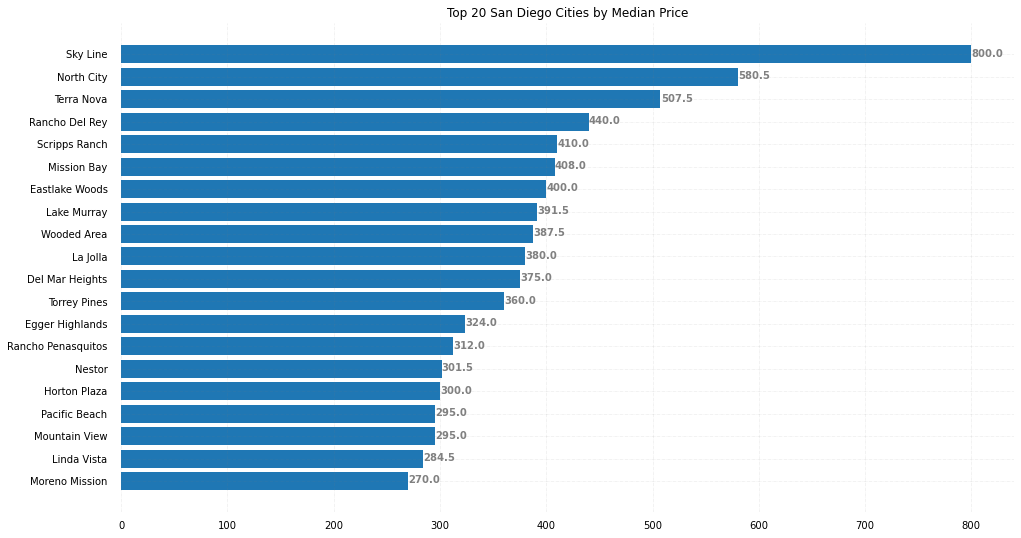

In [44]:
name = sortedgroupprice_SD_entirehome['neighbourhood_cleansed'].head(20)
price = sortedgroupprice_SD_entirehome['price'].head(20)

fig, ax = plt.subplots(figsize = (16, 9))
ax.barh(name, price)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight = 'bold', color='grey')
    
ax.set_title('Top 20 San Diego Cities by Median Price')
    
plt.show()

<b> <font color='blue'>Top 20 San Diego cities grouped by median price for Entire Home rentals.  The top 3 cities/neighborhoods are not the obvious areas one would expect.  Will need to check on frequency of listings since it could just be an individual rental that has a higher than average rental price. Sky Line is an example of just one individual rental that is charging $800 per night. However North City appears to be located in Del Mar Heights which is a desirable and affluent area near the beach.</b> </font>

In [45]:
top10_sandiego_price = sortedgroupprice_SD_entirehome.head(10)
top10_sandiego_price.to_excel(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\top10_sandiego_price.xlsx', 
                          index=False)

<b> San Diego - Other Room Type by Median Price </b>

<b> 97 Cities/Neighborhoods </b>

<b> As expected the median prices for rentals by Other Room Types is much lower than the Entire Home rentals </b>

In [46]:
groupbyprice_SD_other_roomtype = san_diego_other_room_type.groupby(['city_region',
                                                                    'neighbourhood_cleansed'])['price'].median().reset_index()
sortedgroupprice_SD_otherroomtype = groupbyprice_SD_other_roomtype.sort_values(by="price", ascending=False).reset_index()
sortedgroupprice_SD_otherroomtype

,index,city_region,neighbourhood_cleansed,price
0,73,San Diego,Rolling Hills Ranch,290.0
1,17,San Diego,Core,239.0
2,21,San Diego,Del Mar Heights,237.0
3,72,San Diego,Rolando,177.0
4,43,San Diego,Little Italy,169.5
...,...,...,...,...
92,19,San Diego,Darnall,40.0
93,69,San Diego,Paseo Ranchoero,40.0
94,45,San Diego,Lynwood Hills,38.0
95,92,San Diego,Valencia Park,33.0


<b> Los Angeles - Entire Home Dataset Grouped by Median Price</b>

<b> 258 Cities/Neighborhoods </b>

In [47]:
groupbyprice_LA_entirehome = los_angeles_entire_home.groupby(['city_region',
                                                            'neighbourhood_cleansed'])['price'].median().reset_index()
sortedgroupprice_LA_entirehome = groupbyprice_LA_entirehome.sort_values(by="price", ascending=False).reset_index()
sortedgroupprice_LA_entirehome

,index,city_region,neighbourhood_cleansed,price
0,126,Los Angeles,Leona Valley,905.0
1,162,Los Angeles,Paramount,750.0
2,119,Los Angeles,Lake View Terrace,629.0
3,19,Los Angeles,Bel-Air,550.0
4,132,Los Angeles,Malibu,500.0
...,...,...,...,...
253,138,Los Angeles,Maywood,63.0
254,182,Los Angeles,San Fernando,62.0
255,254,Los Angeles,Wilmington,61.5
256,153,Los Angeles,Northwest Antelope Valley,49.0


In [48]:
top10_LA_price = sortedgroupprice_LA_entirehome.head(10)
top10_LA_price.to_excel(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\top10_LA_price.xlsx', 
                          index=False)

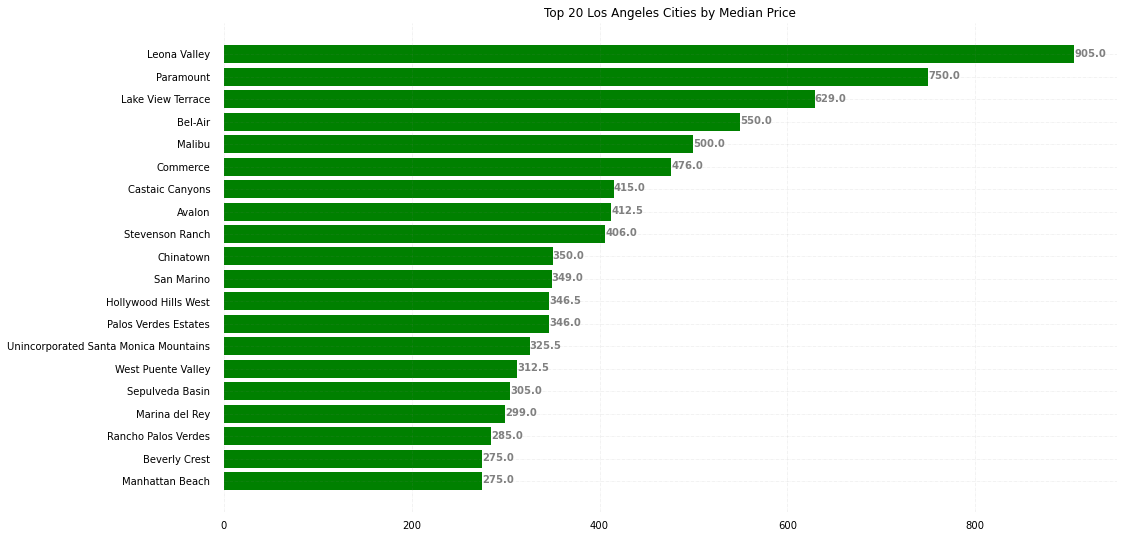

In [49]:
name = sortedgroupprice_LA_entirehome['neighbourhood_cleansed'].head(20)
price = sortedgroupprice_LA_entirehome['price'].head(20)

fig, ax = plt.subplots(figsize = (16, 9))
ax.barh(name, price, color='green')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight = 'bold', color='grey')
    
ax.set_title('Top 20 Los Angeles Cities by Median Price')
    
plt.show()

<b><font color='blue'> Similar to San Diego, Los Angeles rentals by Entire Home have much higher prices than Other Room Types.  However when grouped by median prices Los Angeles generally has higher median prices than San Diego.  </b></font>

<b> Los Angeles - Other Room Type Dataset Grouped by Median Price</b>

<b> 249 Cities/Neighborhoods</b>

In [50]:
groupbyprice_LA_other_roomtype = los_angeles_other_room_type.groupby(['city_region',
                                                                    'neighbourhood_cleansed'])['price'].median().reset_index()
sortedgroupprice_LA_otherroomtype = groupbyprice_LA_other_roomtype.sort_values(by="price", ascending=False).reset_index()
sortedgroupprice_LA_otherroomtype

,index,city_region,neighbourhood_cleansed,price
0,14,Los Angeles,Avalon,371.0
1,171,Los Angeles,Rolling Hills Estates,315.0
2,209,Los Angeles,Tujunga Canyons,300.0
3,93,Los Angeles,Hidden Hills,272.0
4,128,Los Angeles,Malibu,269.0
...,...,...,...,...
244,95,Los Angeles,Historic South-Central,24.0
245,83,Los Angeles,Griffith Park,23.0
246,220,Los Angeles,Vermont Knolls,20.0
247,49,Los Angeles,Cudahy,14.0


<b><font color='blue'> Grouping datasets by frequency to view the most popular cities/neighborhoods in San Diego for Entire Home rentals. </b></font>

<b> San Diego - Entire Home by Frequency Dataset (100 rows)</b>

In [51]:
SDfrequency_entire_home = san_diego_entire_home.groupby(['city_region','neighbourhood_cleansed'])
city_frequencies_SDentirehome = SDfrequency_entire_home.size().reset_index(name='Observations')
sorted_frequencies_SDentirehome = city_frequencies_SDentirehome.sort_values(by="Observations", ascending=False).reset_index()
sorted_frequencies_SDentirehome

,index,city_region,neighbourhood_cleansed,Observations
0,53,San Diego,Mission Bay,1289
1,68,San Diego,Pacific Beach,646
2,23,San Diego,East Village,460
3,40,San Diego,La Jolla,459
4,65,San Diego,Ocean Beach,412
...,...,...,...,...
95,47,San Diego,Lynwood Hills,1
96,43,San Diego,Lincoln Park,1
97,26,San Diego,Eastlake Woods,1
98,36,San Diego,Horton Plaza,1


In [52]:
top10_sandiego_freq = sorted_frequencies_SDentirehome.head(10)
top10_sandiego_freq.to_excel(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\top10_sandiego_freq.xlsx', 
                          index=False)

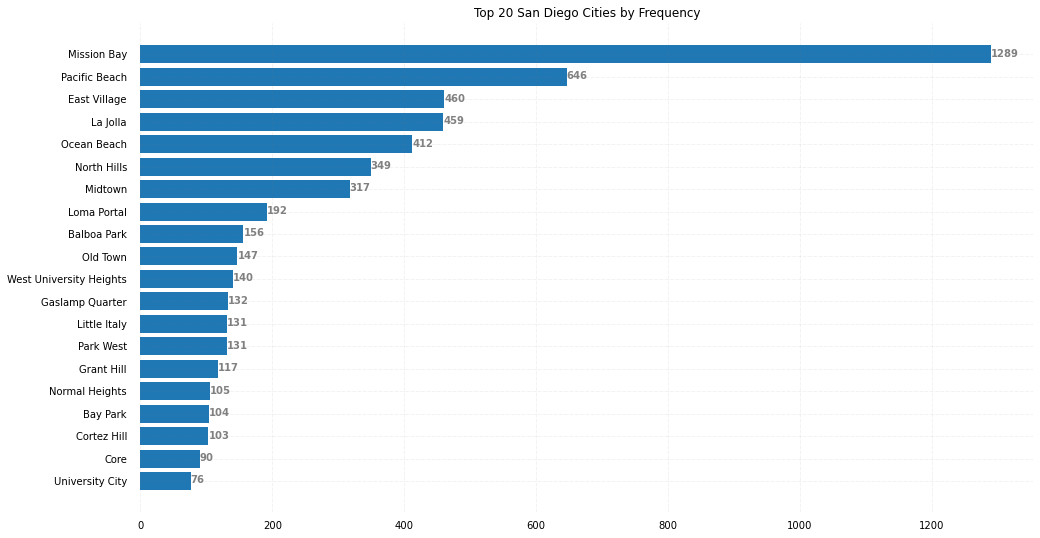

In [53]:
name = sorted_frequencies_SDentirehome['neighbourhood_cleansed'].head(20)
frequency = sorted_frequencies_SDentirehome['Observations'].head(20)

fig, ax = plt.subplots(figsize = (16, 9))
ax.barh(name, frequency)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight = 'bold', color='grey')
    
ax.set_title('Top 20 San Diego Cities by Frequency')
    
plt.show()

<b><font color='blue'> The graph above shows the San Diego beach cities coming out on top when it comes to frequency of listings. The top 5 are all well known beach cities.  The exception is East Village which is the downtown area and home of the Padres baseball team. </b></font>

<b> San Diego - Other Room Type by Frequency (97 rows) </b>

In [54]:
frequency_SDotherroomtype = san_diego_other_room_type.groupby(['city_region','neighbourhood_cleansed'])
city_frequencies_SDother = frequency_SDotherroomtype.size().reset_index(name='Observations')
sorted_frequencies_SD_other = city_frequencies_SDother.sort_values(by="Observations", ascending=False).reset_index()
sorted_frequencies_SD_other

,index,city_region,neighbourhood_cleansed,Observations
0,66,San Diego,Pacific Beach,113
1,50,San Diego,Mira Mesa,97
2,48,San Diego,Midtown,85
3,23,San Diego,East Village,78
4,39,San Diego,La Jolla,62
...,...,...,...,...
92,73,San Diego,Rolling Hills Ranch,1
93,24,San Diego,Eastlake Trails,1
94,69,San Diego,Paseo Ranchoero,1
95,27,San Diego,Egger Highlands,1


<b><font color='blue'>The overall frequency is lower for Other room types, however a few of the same popular city names come up again (i.e. Pacific Beach, East Village, and La Jolla).</b></font>

<b> Los Angeles - Entire Home by Frequencey (258 rows)</b>

In [55]:
LAfrequency_entire_home = los_angeles_entire_home.groupby(['city_region','neighbourhood_cleansed'])
city_frequencies_LAentirehome = LAfrequency_entire_home.size().reset_index(name='Observations')
sorted_frequencies_LAentirehome = city_frequencies_LAentirehome.sort_values(by="Observations", ascending=False).reset_index()
sorted_frequencies_LAentirehome

,index,city_region,neighbourhood_cleansed,Observations
0,228,Los Angeles,Venice,1325
1,99,Los Angeles,Hollywood,1166
2,129,Los Angeles,Long Beach,942
3,56,Los Angeles,Downtown,854
4,189,Los Angeles,Santa Monica,824
...,...,...,...,...
253,126,Los Angeles,Leona Valley,1
254,42,Los Angeles,Chatsworth Reservoir,1
255,119,Los Angeles,Lake View Terrace,1
256,188,Los Angeles,Santa Fe Springs,1


In [56]:
top10_LA_freq = sorted_frequencies_LAentirehome.head(10)
top10_LA_freq.to_excel(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\top10_LA_freq.xlsx', 
                          index=False)

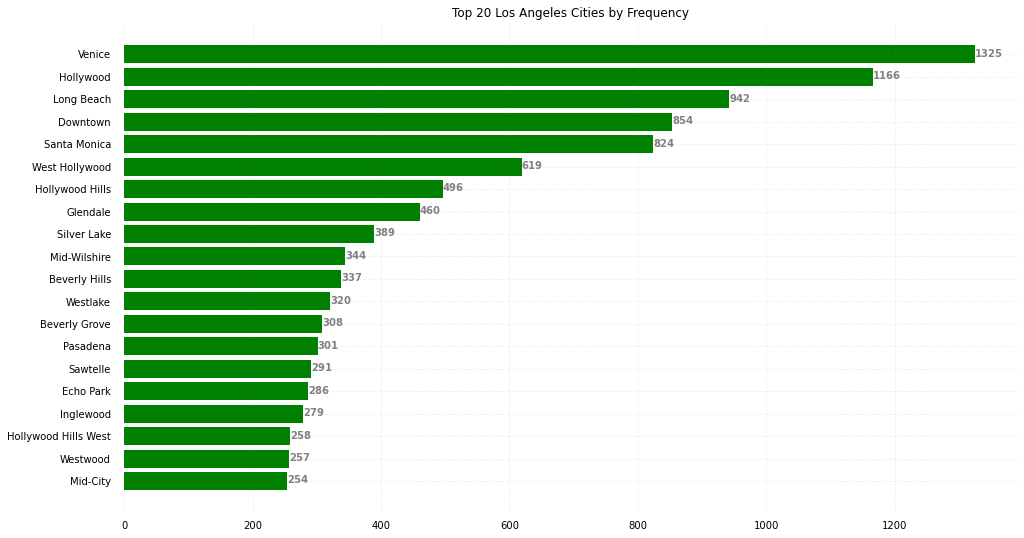

In [57]:
name = sorted_frequencies_LAentirehome['neighbourhood_cleansed'].head(20)
frequency = sorted_frequencies_LAentirehome['Observations'].head(20)

fig, ax = plt.subplots(figsize = (16, 9))
ax.barh(name, frequency, color='green')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight = 'bold', color='grey')
    
ax.set_title('Top 20 Los Angeles Cities by Frequency')
    
plt.show()

<b><font color='blue'>Venice, Hollywood, Long Beach, Downtown LA, and Santa Monica come up as the Top 5 cities by frequency of rentals.  Combination of beach cites and well known locations like Hollywood and Downtown LA.  Surprising to see Long Beach come up in the top 3 as it is outside the main hub of LA and closer to Orange County, CA </b></font>

<b> Los Angeles - Other Room Types by Frequency (249 rows) </b>

In [58]:
frequency_LAotherroomtype = los_angeles_other_room_type.groupby(['city_region','neighbourhood_cleansed'])
city_frequencies_LAother = frequency_LAotherroomtype.size().reset_index(name='Observations')
sorted_frequencies_LA_other = city_frequencies_LAother.sort_values(by="Observations", ascending=False).reset_index()
sorted_frequencies_LA_other

,index,city_region,neighbourhood_cleansed,Observations
0,124,Los Angeles,Long Beach,390
1,96,Los Angeles,Hollywood,385
2,173,Los Angeles,Rowland Heights,315
3,185,Los Angeles,Sherman Oaks,257
4,182,Los Angeles,Santa Monica,247
...,...,...,...,...
244,7,Los Angeles,Angeles Crest,1
245,90,Los Angeles,Hasley Canyon,1
246,213,Los Angeles,Universal City,1
247,210,Los Angeles,Unincorporated Catalina Island,1


<b><font color='blue'> Similar to the trend with San Diego, the Los Angeles Other Room types are lower in frequency compared to the Entire Home rentals. Long Beach actually comes out on top while another surprising city pops up (i.e. Rowland Heights).  Rowland Heights is not a touristy city and is one of the most inland regions of Los Angeles.</b></font>

<i><b><font color='green'>Grouping datasets by medain Revenue to see which cities/neighborhoods bring in the highest revenues. Will they match with the cities that have the highest median prices or those that are the most popular rental cities?</b></i></font>

<b> San Diego - Entire Home grouped by median Revenue (100 rows)</b>

In [59]:
groupbyrevenue_SDentirehome = san_diego_entire_home.groupby(['city_region',
                                                          'neighbourhood_cleansed'])['Revenue_Year'].median().reset_index()
sortedgroup_revenue_SDentirehome = groupbyrevenue_SDentirehome.sort_values(by="Revenue_Year", ascending=False).reset_index()
sortedgroup_revenue_SDentirehome

,index,city_region,neighbourhood_cleansed,Revenue_Year
0,90,San Diego,Terra Nova,11163.5
1,1,San Diego,Alta Vista,7579.0
2,43,San Diego,Lincoln Park,6968.0
3,11,San Diego,Chollas View,6500.0
4,58,San Diego,Nestor,6435.0
...,...,...,...,...
95,81,San Diego,Scripps Ranch,72.5
96,83,San Diego,Sky Line,0.0
97,26,San Diego,Eastlake Woods,0.0
98,16,San Diego,Columbia,0.0


In [60]:
top10_sandiego_revenue = sortedgroup_revenue_SDentirehome.head(10)
top10_sandiego_revenue.to_excel(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\top10_sandiego_revenue.xlsx', 
                          index=False)

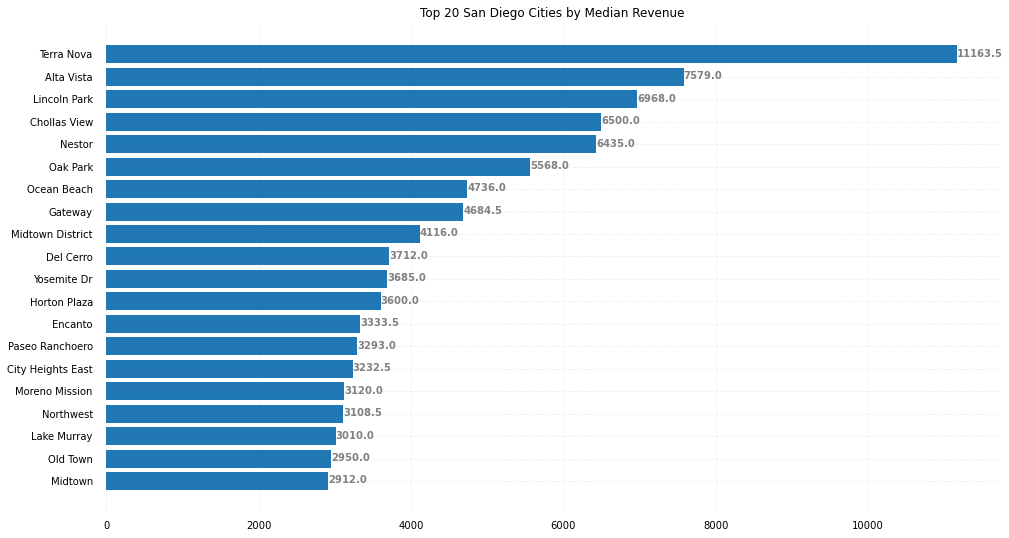

In [61]:
name = sortedgroup_revenue_SDentirehome['neighbourhood_cleansed'].head(20)
revenue = sortedgroup_revenue_SDentirehome['Revenue_Year'].head(20)

fig, ax = plt.subplots(figsize = (16, 9))
ax.barh(name, revenue)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight = 'bold', color='grey')
    
ax.set_title('Top 20 San Diego Cities by Median Revenue')
    
plt.show()

<b><font color='blue'>The Top 5 Cities with the highest median revenues were all unexpected results. They are all neighborhoods a few miles inland from the beach. Upon further review it was revealed they are all individual rentals that brought in higher revenues.  The frequency for these neighborhoods was very low and do not represent a consistent trend. </b></font>

<b> San Diego - Other Room Types by median Revenue (97 rows)</b>

In [62]:
groupbyrevenue_SDother = san_diego_other_room_type.groupby(['city_region',
                                                         'neighbourhood_cleansed'])['Revenue_Year'].median().reset_index()
sortedgroup_revenue_SD_other = groupbyrevenue_SDother.sort_values(by="Revenue_Year", ascending=False).reset_index()
sortedgroup_revenue_SD_other

,index,city_region,neighbourhood_cleansed,Revenue_Year
0,96,San Diego,Yosemite Dr,2961.5
1,95,San Diego,Wooded Area,1500.0
2,72,San Diego,Rolando,1175.0
3,68,San Diego,Park West,1116.0
4,43,San Diego,Little Italy,1072.0
...,...,...,...,...
92,9,San Diego,Carmel Mountain,0.0
93,64,San Diego,Old Town,0.0
94,73,San Diego,Rolling Hills Ranch,0.0
95,75,San Diego,Sabre Springs,0.0


<b><font color='blue'>The Other Room type of rentals in San Diego is lower than the Entire Home rentals, following previous trends.  The Top 2 are in fact individual rentals that brought in high revenue and had no other competition in their neighborhoods.  While Rolando, Park West, and Little Italy were all neighborhoods with higher popularity that brought in higher revenues as a whole.  These neighborhoods were close to Downtown, Gaslamp Quarter, shops/restuarants, San Diego State University, and other touristy areas. </b></font>

<b> Los Angeles - Entire Home by median Revenue (258 rows)</b>

In [63]:
groupbyrevenue_LAentirehome = los_angeles_entire_home.groupby(['city_region',
                                                          'neighbourhood_cleansed'])['Revenue_Year'].median().reset_index()
sortedgroup_revenue_LA_entirehome = groupbyrevenue_LAentirehome.sort_values(by="Revenue_Year", ascending=False).reset_index()
sortedgroup_revenue_LA_entirehome

,index,city_region,neighbourhood_cleansed,Revenue_Year
0,119,Los Angeles,Lake View Terrace,22644.0
1,126,Los Angeles,Leona Valley,19910.0
2,64,Los Angeles,East Whittier,13764.0
3,176,Los Angeles,Ridge Route,7392.0
4,5,Los Angeles,Alondra Park,5809.0
...,...,...,...,...
253,181,Los Angeles,San Dimas,0.0
254,73,Los Angeles,Exposition Park,0.0
255,44,Los Angeles,Cheviot Hills,0.0
256,178,Los Angeles,Rolling Hills Estates,0.0


In [64]:
top10_la_revenue = sortedgroup_revenue_LA_entirehome.head(10)
top10_la_revenue.to_excel(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\top10_la_revenue.xlsx', 
                          index=False)

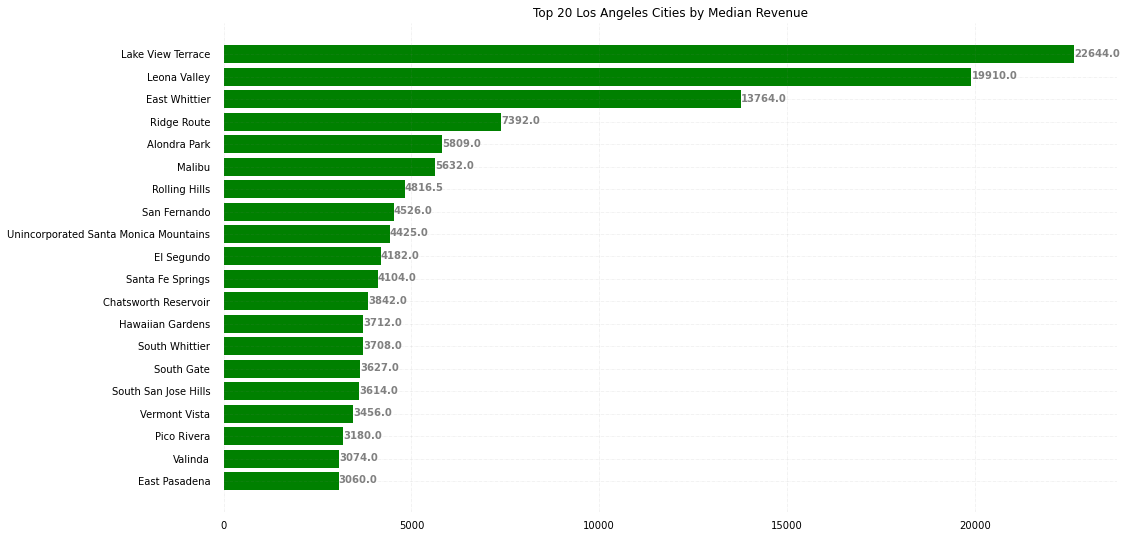

In [65]:
name = sortedgroup_revenue_LA_entirehome['neighbourhood_cleansed'].head(20)
revenue = sortedgroup_revenue_LA_entirehome['Revenue_Year'].head(20)

fig, ax = plt.subplots(figsize = (16, 9))
ax.barh(name, revenue, color='green')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight = 'bold', color='grey')
    
ax.set_title('Top 20 Los Angeles Cities by Median Revenue')
    
plt.show()

<b><font color='blue'>Similar to San Diego, the results for the LA cities/neighborhoods with the highest median revenues was unexpected.  The Top 5 are mainly outliers, since they are individual rentals that were highly successful.  All of them are far inland, especially Lake View Terrace, Leona Valley, and Ridge Route that are in the outskirts of LA.  The appeal to having open land and being away from the city could be coming into play. </b></font>

<b> Los Angeles - Other Room Type by median Revenue (249 rows)</b>

In [66]:
groupbyrevenue_LAother = los_angeles_other_room_type.groupby(['city_region',
                                                         'neighbourhood_cleansed'])['Revenue_Year'].median().reset_index()
sortedgroup_revenue_LA_other = groupbyrevenue_LAother.sort_values(by="Revenue_Year", ascending=False).reset_index()
sortedgroup_revenue_LA_other

,index,city_region,neighbourhood_cleansed,Revenue_Year
0,14,Los Angeles,Avalon,5936.0
1,181,Los Angeles,Santa Fe Springs,2952.0
2,103,Los Angeles,Irwindale,1500.0
3,20,Los Angeles,Bell,1327.5
4,175,Los Angeles,San Fernando,1224.0
...,...,...,...,...
244,106,Los Angeles,La Canada Flintridge,0.0
245,107,Los Angeles,La Crescenta-Montrose,0.0
246,108,Los Angeles,La Habra Heights,0.0
247,109,Los Angeles,La Mirada,0.0


<b><font color='blue'>The revenue for the Other Room types is much lower than the rentals for Entire Homes. Avalon is an outlier as it is a city on the island of Catalina which can arguably not even be considered as being part of LA.  The others tended to a handful of rentals that did well even though they are not areas with expensive housing.</b></font>

<b><font color='green'>Grouping the datasets my median Reviews.  Since the Airbnb dataset does not include information on how many times the rental was occupied by a customer over a series of time an assumption has to be made.  One could assume if a customer left a review, they stayed at least one night at the rental.  With that in mind, review number multiplied by rental price equals the estimataed revenue earned.</b></font>

<b> San Diego - Entire Home grouped by median yearly Reviews (100 rows)</b>

In [67]:
reviews_ltm_df_SD_entirehome = san_diego_entire_home[['city_region','neighbourhood_cleansed','number_of_reviews_ltm']]
group_by_reviews_SD_entirehome = reviews_ltm_df_SD_entirehome.groupby(['city_region',
                                                        'neighbourhood_cleansed'])['number_of_reviews_ltm'
                                                                                  ].median().reset_index()
sorted_reviews_SD_entirehome = group_by_reviews_SD_entirehome.sort_values(by="number_of_reviews_ltm", 
                                                                       ascending=False).reset_index()
sorted_reviews_SD_entirehome

,index,city_region,neighbourhood_cleansed,number_of_reviews_ltm
0,43,San Diego,Lincoln Park,104.0
1,64,San Diego,Oak Park,58.0
2,99,San Diego,Yosemite Dr,55.0
3,72,San Diego,Paseo Ranchoero,37.0
4,33,San Diego,Gateway,30.5
...,...,...,...,...
95,81,San Diego,Scripps Ranch,0.5
96,47,San Diego,Lynwood Hills,0.0
97,26,San Diego,Eastlake Woods,0.0
98,83,San Diego,Sky Line,0.0


In [68]:
top10_sandiego_reviews = sorted_reviews_SD_entirehome.head(10)
top10_sandiego_reviews.to_excel(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\top10_sandiego_reviews.xlsx', 
                          index=False)

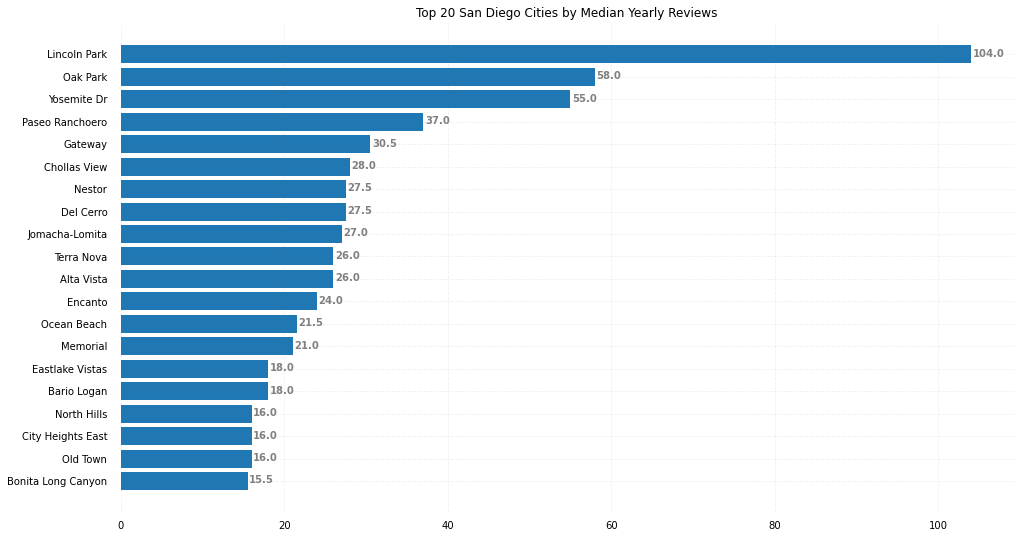

In [69]:
name = sorted_reviews_SD_entirehome['neighbourhood_cleansed'].head(20)
reviews = sorted_reviews_SD_entirehome['number_of_reviews_ltm'].head(20)

fig, ax = plt.subplots(figsize = (16, 9))
ax.barh(name, reviews)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight = 'bold', color='grey')
    
ax.set_title('Top 20 San Diego Cities by Median Yearly Reviews')
    
plt.show()

<b><font color='blue'>As anticipated the cities/neighborhoods that come out on top tend to be a handful of individual rentals that had a high number of reviews but do not represent a particular trend. </b></font>

<b> San Diego - Other Room Types by Reviews (97 rows)</b>

In [70]:
reviews_ltm_df_SD_other_rooms = san_diego_other_room_type[['city_region','neighbourhood_cleansed','number_of_reviews_ltm']]
group_by_reviews_SD_other_rooms = reviews_ltm_df_SD_other_rooms.groupby(['city_region',
                                                        'neighbourhood_cleansed'])['number_of_reviews_ltm'
                                                                                  ].median().reset_index()
sorted_reviews_SD_other_rooms = group_by_reviews_SD_other_rooms.sort_values(by="number_of_reviews_ltm", 
                                                                       ascending=False).reset_index()
sorted_reviews_SD_other_rooms

,index,city_region,neighbourhood_cleansed,number_of_reviews_ltm
0,96,San Diego,Yosemite Dr,45.0
1,12,San Diego,City Heights East,15.0
2,68,San Diego,Park West,15.0
3,72,San Diego,Rolando,13.5
4,1,San Diego,Alta Vista,12.5
...,...,...,...,...
92,27,San Diego,Egger Highlands,0.0
93,76,San Diego,San Carlos,0.0
94,75,San Diego,Sabre Springs,0.0
95,73,San Diego,Rolling Hills Ranch,0.0


<b><font color='blue'>The findings here are more relevant and have less outliers.  City Heights East, Park West, and Rolando all are popular regions and do not necessarily just have one individual rental that was highly successful. </b></font>

<b> Los Angeles - Entire Home grouped by median Reviews (258 rows)</b>

In [71]:
reviews_ltm_df_LAentirehome = los_angeles_entire_home[['city_region','neighbourhood_cleansed','number_of_reviews_ltm']]
group_by_reviews_LA_entirehome = reviews_ltm_df_LAentirehome.groupby(['city_region',
                                                        'neighbourhood_cleansed'])['number_of_reviews_ltm'
                                                                                  ].median().reset_index()
sorted_reviews_LA_entirehome = group_by_reviews_LA_entirehome.sort_values(by="number_of_reviews_ltm", 
                                                                       ascending=False).reset_index()
sorted_reviews_LA_entirehome

,index,city_region,neighbourhood_cleansed,number_of_reviews_ltm
0,182,Los Angeles,San Fernando,73.0
1,64,Los Angeles,East Whittier,62.0
2,176,Los Angeles,Ridge Route,56.0
3,106,Los Angeles,Irwindale,52.0
4,9,Los Angeles,Arleta,37.0
...,...,...,...,...
253,88,Los Angeles,Harbor City,0.0
254,39,Los Angeles,Cerritos,0.0
255,22,Los Angeles,Bellflower,0.0
256,21,Los Angeles,Bell Gardens,0.0


In [72]:
top10_la_reviews = sorted_reviews_LA_entirehome.head(10)
top10_la_reviews.to_excel(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\top10_la_reviews.xlsx', 
                          index=False)

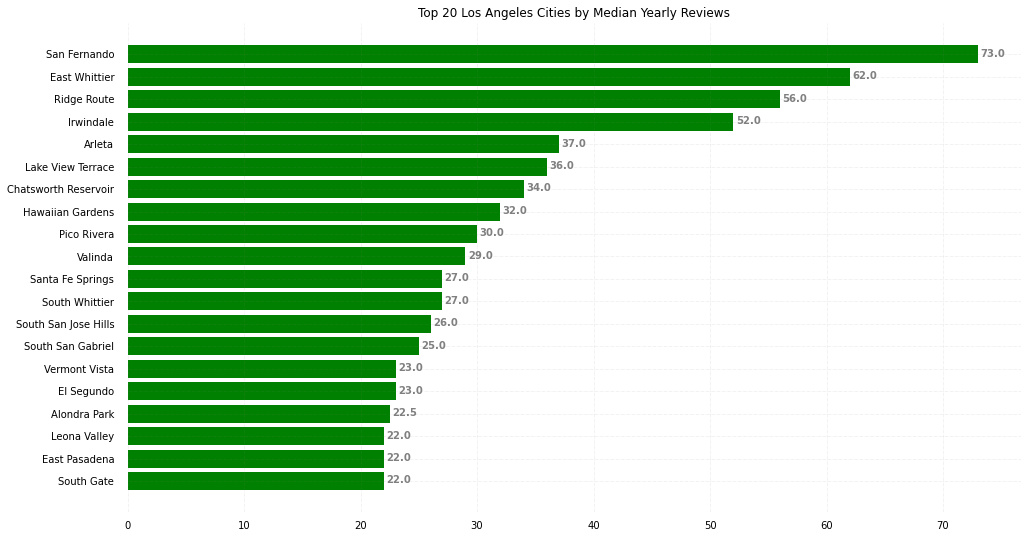

In [73]:
name = sorted_reviews_LA_entirehome['neighbourhood_cleansed'].head(20)
reviews = sorted_reviews_LA_entirehome['number_of_reviews_ltm'].head(20)

fig, ax = plt.subplots(figsize = (16, 9))
ax.barh(name, reviews, color='green')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight = 'bold', color='grey')
    
ax.set_title('Top 20 Los Angeles Cities by Median Yearly Reviews')
    
plt.show()

<b><font color='blue'>A few of the same cities/neighborhoods that appeared on the highest median revenues list are present on this list with the top median yearly reviews.  There is a correlation between higher numbers of reviews and revenue brought in. The top 5 however are all a handful of individual rentals that had a high number or reviews.</b></font>

<b>Los Angeles - Other Room Type by Reviews (249 rows)</b>

In [74]:
reviews_ltm_df_LA_other_rooms = los_angeles_other_room_type[['city_region','neighbourhood_cleansed','number_of_reviews_ltm']]
group_by_reviews_LA_other_rooms = reviews_ltm_df_LA_other_rooms.groupby(['city_region',
                                                        'neighbourhood_cleansed'])['number_of_reviews_ltm'
                                                                                  ].median().reset_index()
sorted_reviews_LA_other_rooms = group_by_reviews_LA_other_rooms.sort_values(by="number_of_reviews_ltm", 
                                                                       ascending=False).reset_index()
sorted_reviews_LA_other_rooms

,index,city_region,neighbourhood_cleansed,number_of_reviews_ltm
0,181,Los Angeles,Santa Fe Springs,36.0
1,20,Los Angeles,Bell,23.5
2,175,Los Angeles,San Fernando,20.0
3,103,Los Angeles,Irwindale,20.0
4,14,Los Angeles,Avalon,16.0
...,...,...,...,...
244,106,Los Angeles,La Canada Flintridge,0.0
245,107,Los Angeles,La Crescenta-Montrose,0.0
246,108,Los Angeles,La Habra Heights,0.0
247,109,Los Angeles,La Mirada,0.0


<b><font color='blue'>Following previous trends, the number of reviews are lower for Other Room types compared to Entire Home rentals.  The top 5 are mainly a handful of individual rentals that have a high number of reviews but do not represent a particular trend in the city/neighborhood. </b></font>

<b><font color='green'>Since many of the outliers made it to the top of the numerical rankings it would be beneficial to merge the datasets for further analysis. </b></font>

<b> Merge the San Diego - Entire Home datasets</b>

In [75]:
# Merge the grouped price dataset with the frequency dataset
SDmerge = pd.merge(left=sortedgroupprice_SD_entirehome, right=sorted_frequencies_SDentirehome, how="left", 
                          left_on="index", right_on="index")
print("Group Price Dataset - Entire Home", len(sortedgroupprice_SD_entirehome))
print("Frequencies - Entire Home", len(SDmerge))
SDmerge = SDmerge.drop(["city_region_y", "neighbourhood_cleansed_y"], axis=1)
SDmerge.rename(columns={"city_region_x":"city_region", "neighbourhood_cleansed_x":"neighbourhood_cleansed"}, inplace=True)
SDmerge

Group Price Dataset - Entire Home 100
Frequencies - Entire Home 100


,index,city_region,neighbourhood_cleansed,price,Observations
0,83,San Diego,Sky Line,800.0,1
1,60,San Diego,North City,580.5,18
2,90,San Diego,Terra Nova,507.5,4
3,74,San Diego,Rancho Del Rey,440.0,5
4,81,San Diego,Scripps Ranch,410.0,6
...,...,...,...,...,...
95,25,San Diego,Eastlake Vistas,71.5,2
96,92,San Diego,Tijuana River Valley,71.0,2
97,43,San Diego,Lincoln Park,67.0,1
98,99,San Diego,Yosemite Dr,67.0,3


In [76]:
# Merge above dataset with Revenue_Year dataset
SDmerge2 = pd.merge(left=SDmerge, right=sortedgroup_revenue_SDentirehome, how="left", 
                          left_on="index", right_on="index")
print("Group Main Dataset - Entire Home", len(SDmerge))
print("Revenue - Entire Home", len(SDmerge2))
SDmerge2 = SDmerge2.drop(["city_region_y", "neighbourhood_cleansed_y"], axis=1)
SDmerge2.rename(columns={"city_region_x":"city_region", "neighbourhood_cleansed_x":"neighbourhood_cleansed"}, inplace=True)
SDmerge2

Group Main Dataset - Entire Home 100
Revenue - Entire Home 100


,index,city_region,neighbourhood_cleansed,price,Observations,Revenue_Year
0,83,San Diego,Sky Line,800.0,1,0.0
1,60,San Diego,North City,580.5,18,1291.0
2,90,San Diego,Terra Nova,507.5,4,11163.5
3,74,San Diego,Rancho Del Rey,440.0,5,1424.0
4,81,San Diego,Scripps Ranch,410.0,6,72.5
...,...,...,...,...,...,...
95,25,San Diego,Eastlake Vistas,71.5,2,1210.5
96,92,San Diego,Tijuana River Valley,71.0,2,92.0
97,43,San Diego,Lincoln Park,67.0,1,6968.0
98,99,San Diego,Yosemite Dr,67.0,3,3685.0


In [77]:
# Merge above dataset with number of yearly reviews dataset
SDmerge3 = pd.merge(left=SDmerge2, right=sorted_reviews_SD_entirehome, how="left", 
                          left_on="index", right_on="index")
print("Group Main Dataset - Entire Home", len(SDmerge2))
print("Reviews - Entire Home", len(SDmerge3))
SDmerge3 = SDmerge3.drop(["city_region_y", "neighbourhood_cleansed_y"], axis=1)
SDmerge3.rename(columns={"city_region_x":"city_region", "neighbourhood_cleansed_x":"neighbourhood_cleansed"}, inplace=True)
SDmerge3

Group Main Dataset - Entire Home 100
Reviews - Entire Home 100


,index,city_region,neighbourhood_cleansed,price,Observations,Revenue_Year,number_of_reviews_ltm
0,83,San Diego,Sky Line,800.0,1,0.0,0.0
1,60,San Diego,North City,580.5,18,1291.0,2.0
2,90,San Diego,Terra Nova,507.5,4,11163.5,26.0
3,74,San Diego,Rancho Del Rey,440.0,5,1424.0,7.0
4,81,San Diego,Scripps Ranch,410.0,6,72.5,0.5
...,...,...,...,...,...,...,...
95,25,San Diego,Eastlake Vistas,71.5,2,1210.5,18.0
96,92,San Diego,Tijuana River Valley,71.0,2,92.0,1.5
97,43,San Diego,Lincoln Park,67.0,1,6968.0,104.0
98,99,San Diego,Yosemite Dr,67.0,3,3685.0,55.0


<b> Merge the San Diego - Other Room Type datasets</b>

In [78]:
# Merge San Diego (Other Room types) with frequency dataset
SDmerge_other = pd.merge(left=sortedgroupprice_SD_otherroomtype, right=sorted_frequencies_SD_other, how="left", 
                          left_on="index", right_on="index")
print("Group Price Dataset - Other", len(sortedgroupprice_SD_otherroomtype))
print("Frequencies - Other", len(SDmerge_other))
SDmerge_other = SDmerge_other.drop(["city_region_y", "neighbourhood_cleansed_y"], axis=1)
SDmerge_other.rename(columns={"city_region_x":"city_region", 
                              "neighbourhood_cleansed_x":"neighbourhood_cleansed"}, inplace=True)
SDmerge_other

Group Price Dataset - Other 97
Frequencies - Other 97


,index,city_region,neighbourhood_cleansed,price,Observations
0,73,San Diego,Rolling Hills Ranch,290.0,1
1,17,San Diego,Core,239.0,21
2,21,San Diego,Del Mar Heights,237.0,5
3,72,San Diego,Rolando,177.0,12
4,43,San Diego,Little Italy,169.5,26
...,...,...,...,...,...
92,19,San Diego,Darnall,40.0,7
93,69,San Diego,Paseo Ranchoero,40.0,1
94,45,San Diego,Lynwood Hills,38.0,4
95,92,San Diego,Valencia Park,33.0,5


In [79]:
# Merge above dataset with Revenue_Year dataset
SDmerge_other2 = pd.merge(left=SDmerge_other, right=sortedgroup_revenue_SD_other, how="left", 
                          left_on="index", right_on="index")
print("Group Main Dataset - Other", len(SDmerge_other))
print("Revenue - Other", len(SDmerge_other2))
SDmerge_other2 = SDmerge_other2.drop(["city_region_y", "neighbourhood_cleansed_y"], axis=1)
SDmerge_other2.rename(columns={"city_region_x":"city_region", 
                              "neighbourhood_cleansed_x":"neighbourhood_cleansed"}, inplace=True)
SDmerge_other2

Group Main Dataset - Other 97
Revenue - Other 97


,index,city_region,neighbourhood_cleansed,price,Observations,Revenue_Year
0,73,San Diego,Rolling Hills Ranch,290.0,1,0.0
1,17,San Diego,Core,239.0,21,0.0
2,21,San Diego,Del Mar Heights,237.0,5,113.0
3,72,San Diego,Rolando,177.0,12,1175.0
4,43,San Diego,Little Italy,169.5,26,1072.0
...,...,...,...,...,...,...
92,19,San Diego,Darnall,40.0,7,0.0
93,69,San Diego,Paseo Ranchoero,40.0,1,80.0
94,45,San Diego,Lynwood Hills,38.0,4,92.5
95,92,San Diego,Valencia Park,33.0,5,0.0


In [80]:
# Merge above dataset with number of yearly reviews dataset
SDmerge_other3 = pd.merge(left=SDmerge_other2, right=sorted_reviews_SD_other_rooms, how="left", 
                          left_on="index", right_on="index")
print("Group Main Dataset - Other", len(SDmerge_other2))
print("Reviews - Other", len(SDmerge_other3))
SDmerge_other3 = SDmerge_other3.drop(["city_region_y", "neighbourhood_cleansed_y"], axis=1)
SDmerge_other3.rename(columns={"city_region_x":"city_region", 
                              "neighbourhood_cleansed_x":"neighbourhood_cleansed"}, inplace=True)
SDmerge_other3

Group Main Dataset - Other 97
Reviews - Other 97


,index,city_region,neighbourhood_cleansed,price,Observations,Revenue_Year,number_of_reviews_ltm
0,73,San Diego,Rolling Hills Ranch,290.0,1,0.0,0.0
1,17,San Diego,Core,239.0,21,0.0,0.0
2,21,San Diego,Del Mar Heights,237.0,5,113.0,1.0
3,72,San Diego,Rolando,177.0,12,1175.0,13.5
4,43,San Diego,Little Italy,169.5,26,1072.0,8.5
...,...,...,...,...,...,...,...
92,19,San Diego,Darnall,40.0,7,0.0,0.0
93,69,San Diego,Paseo Ranchoero,40.0,1,80.0,2.0
94,45,San Diego,Lynwood Hills,38.0,4,92.5,2.5
95,92,San Diego,Valencia Park,33.0,5,0.0,0.0


<b><font color='blue'>Perform same action on Los Angeles datasets.</b></font>

<b> Merge Los Angeles - Entire Home Datasets</b>

In [81]:
# Merge pricing dataset with frequency dataset
LAmerge = pd.merge(left=sortedgroupprice_LA_entirehome, right=sorted_frequencies_LAentirehome, how="left", 
                          left_on="index", right_on="index")
print("Group Price Dataset - Entire Home", len(sortedgroupprice_LA_entirehome))
print("Frequencies - Entire Home", len(LAmerge))
LAmerge = LAmerge.drop(["city_region_y", "neighbourhood_cleansed_y"], axis=1)
LAmerge.rename(columns={"city_region_x":"city_region", "neighbourhood_cleansed_x":"neighbourhood_cleansed"}, inplace=True)
LAmerge

Group Price Dataset - Entire Home 258
Frequencies - Entire Home 258


,index,city_region,neighbourhood_cleansed,price,Observations
0,126,Los Angeles,Leona Valley,905.0,1
1,162,Los Angeles,Paramount,750.0,4
2,119,Los Angeles,Lake View Terrace,629.0,1
3,19,Los Angeles,Bel-Air,550.0,24
4,132,Los Angeles,Malibu,500.0,113
...,...,...,...,...,...
253,138,Los Angeles,Maywood,63.0,7
254,182,Los Angeles,San Fernando,62.0,1
255,254,Los Angeles,Wilmington,61.5,6
256,153,Los Angeles,Northwest Antelope Valley,49.0,1


In [82]:
# Merge above dataset with Revenue_Year dataset
LAmerge2 = pd.merge(left=LAmerge, right=sortedgroup_revenue_LA_entirehome, how="left", 
                          left_on="index", right_on="index")
print("Main Dataset - Entire Home", len(LAmerge))
print("Revenue - Entire Home", len(LAmerge2))
LAmerge2 = LAmerge2.drop(["city_region_y", "neighbourhood_cleansed_y"], axis=1)
LAmerge2.rename(columns={"city_region_x":"city_region", "neighbourhood_cleansed_x":"neighbourhood_cleansed"}, inplace=True)
LAmerge2

Main Dataset - Entire Home 258
Revenue - Entire Home 258


,index,city_region,neighbourhood_cleansed,price,Observations,Revenue_Year
0,126,Los Angeles,Leona Valley,905.0,1,19910.0
1,162,Los Angeles,Paramount,750.0,4,550.0
2,119,Los Angeles,Lake View Terrace,629.0,1,22644.0
3,19,Los Angeles,Bel-Air,550.0,24,0.0
4,132,Los Angeles,Malibu,500.0,113,5632.0
...,...,...,...,...,...,...
253,138,Los Angeles,Maywood,63.0,7,220.0
254,182,Los Angeles,San Fernando,62.0,1,4526.0
255,254,Los Angeles,Wilmington,61.5,6,478.0
256,153,Los Angeles,Northwest Antelope Valley,49.0,1,147.0


In [83]:
# Merge above dataset with yearly number of reviews dataset
LAmerge3 = pd.merge(left=LAmerge2, right=sorted_reviews_LA_entirehome, how="left", 
                          left_on="index", right_on="index")
print("Main Dataset - Entire Home", len(LAmerge2))
print("Reviews - Entire Home", len(LAmerge3))
LAmerge3 = LAmerge3.drop(["city_region_y", "neighbourhood_cleansed_y"], axis=1)
LAmerge3.rename(columns={"city_region_x":"city_region", "neighbourhood_cleansed_x":"neighbourhood_cleansed"}, inplace=True)
LAmerge3

Main Dataset - Entire Home 258
Reviews - Entire Home 258


,index,city_region,neighbourhood_cleansed,price,Observations,Revenue_Year,number_of_reviews_ltm
0,126,Los Angeles,Leona Valley,905.0,1,19910.0,22.0
1,162,Los Angeles,Paramount,750.0,4,550.0,1.0
2,119,Los Angeles,Lake View Terrace,629.0,1,22644.0,36.0
3,19,Los Angeles,Bel-Air,550.0,24,0.0,0.0
4,132,Los Angeles,Malibu,500.0,113,5632.0,11.0
...,...,...,...,...,...,...,...
253,138,Los Angeles,Maywood,63.0,7,220.0,3.0
254,182,Los Angeles,San Fernando,62.0,1,4526.0,73.0
255,254,Los Angeles,Wilmington,61.5,6,478.0,8.0
256,153,Los Angeles,Northwest Antelope Valley,49.0,1,147.0,3.0


<b> Merge Los Angeles - Other Room Type Datasets</b>

In [84]:
# Merge Los Angeles (Other Room types) pricing dataset with frequency dataset
LAmerge_other = pd.merge(left=sortedgroupprice_LA_otherroomtype, right=sorted_frequencies_LA_other, how="left", 
                          left_on="index", right_on="index")
print("Group Price Dataset - Other", len(sortedgroupprice_LA_otherroomtype))
print("Frequencies - Other", len(LAmerge_other))
LAmerge_other = LAmerge_other.drop(["city_region_y", "neighbourhood_cleansed_y"], axis=1)
LAmerge_other.rename(columns={"city_region_x":"city_region", 
                              "neighbourhood_cleansed_x":"neighbourhood_cleansed"}, inplace=True)
LAmerge_other

Group Price Dataset - Other 249
Frequencies - Other 249


,index,city_region,neighbourhood_cleansed,price,Observations
0,14,Los Angeles,Avalon,371.0,3
1,171,Los Angeles,Rolling Hills Estates,315.0,2
2,209,Los Angeles,Tujunga Canyons,300.0,2
3,93,Los Angeles,Hidden Hills,272.0,1
4,128,Los Angeles,Malibu,269.0,23
...,...,...,...,...,...
244,95,Los Angeles,Historic South-Central,24.0,94
245,83,Los Angeles,Griffith Park,23.0,1
246,220,Los Angeles,Vermont Knolls,20.0,25
247,49,Los Angeles,Cudahy,14.0,1


In [85]:
# Merge above dataset with Revenue_Year datset
LAmerge_other2 = pd.merge(left=LAmerge_other, right=sortedgroup_revenue_LA_other, how="left", 
                          left_on="index", right_on="index")
print("Main Dataset - Other", len(LAmerge_other))
print("Revenue - Other", len(LAmerge_other2))
LAmerge_other2 = LAmerge_other2.drop(["city_region_y", "neighbourhood_cleansed_y"], axis=1)
LAmerge_other2.rename(columns={"city_region_x":"city_region", 
                              "neighbourhood_cleansed_x":"neighbourhood_cleansed"}, inplace=True)
LAmerge_other2

Main Dataset - Other 249
Revenue - Other 249


,index,city_region,neighbourhood_cleansed,price,Observations,Revenue_Year
0,14,Los Angeles,Avalon,371.0,3,5936.0
1,171,Los Angeles,Rolling Hills Estates,315.0,2,0.0
2,209,Los Angeles,Tujunga Canyons,300.0,2,0.0
3,93,Los Angeles,Hidden Hills,272.0,1,0.0
4,128,Los Angeles,Malibu,269.0,23,500.0
...,...,...,...,...,...,...
244,95,Los Angeles,Historic South-Central,24.0,94,0.0
245,83,Los Angeles,Griffith Park,23.0,1,161.0
246,220,Los Angeles,Vermont Knolls,20.0,25,18.0
247,49,Los Angeles,Cudahy,14.0,1,0.0


In [86]:
# Merge above dataset with yearly number of reviews dataset
LAmerge_other3 = pd.merge(left=LAmerge_other2, right=sorted_reviews_LA_other_rooms, how="left", 
                          left_on="index", right_on="index")
print("Main Dataset - Other", len(LAmerge_other2))
print("Reviews - Other", len(LAmerge_other3))
LAmerge_other3 = LAmerge_other3.drop(["city_region_y", "neighbourhood_cleansed_y"], axis=1)
LAmerge_other3.rename(columns={"city_region_x":"city_region", 
                              "neighbourhood_cleansed_x":"neighbourhood_cleansed"}, inplace=True)
LAmerge_other3

Main Dataset - Other 249
Reviews - Other 249


,index,city_region,neighbourhood_cleansed,price,Observations,Revenue_Year,number_of_reviews_ltm
0,14,Los Angeles,Avalon,371.0,3,5936.0,16.0
1,171,Los Angeles,Rolling Hills Estates,315.0,2,0.0,0.0
2,209,Los Angeles,Tujunga Canyons,300.0,2,0.0,0.0
3,93,Los Angeles,Hidden Hills,272.0,1,0.0,0.0
4,128,Los Angeles,Malibu,269.0,23,500.0,2.0
...,...,...,...,...,...,...,...
244,95,Los Angeles,Historic South-Central,24.0,94,0.0,0.0
245,83,Los Angeles,Griffith Park,23.0,1,161.0,7.0
246,220,Los Angeles,Vermont Knolls,20.0,25,18.0,1.0
247,49,Los Angeles,Cudahy,14.0,1,0.0,0.0


<b> Describe the numerical columns in the final merged San Diego - Entire Home dataset</b>

In [87]:
final_merge_SD_entirehome = SDmerge3
final_merge_SD_entirehome[['price', 'Revenue_Year', 'Observations', 'number_of_reviews_ltm']].describe()

,price,Revenue_Year,Observations,number_of_reviews_ltm
count,100.00000,100.000000,100.000000,100.000000
mean,208.87500,1915.405000,70.370000,11.455000
std,115.28146,1837.801234,164.221128,13.805667
min,65.50000,0.000000,1.000000,0.000000
25%,139.87500,688.625000,4.750000,4.000000
50%,184.00000,1472.000000,17.500000,7.750000
75%,236.00000,2686.125000,55.500000,14.000000
max,800.00000,11163.500000,1289.000000,104.000000


<b> Split merged San Diego - Entire Home dataset by upper median utilizing the described function above.  This will filter out prices under the 50% percentile, outlier neighborhoods that had just one or two lucrative rentals, revenues under the 50% percentile, and yearly reviews that were under the 50% percentile. </b>

<b><font color='red'> 7 rows remain after the split </b></font>

In [88]:
upper_median_dataset = final_merge_SD_entirehome.mask(final_merge_SD_entirehome['Observations'] < 17.5)
upper_median_dataset = upper_median_dataset.mask(upper_median_dataset['price'] < 184)
upper_median_dataset = upper_median_dataset.mask(upper_median_dataset['Revenue_Year'] < 1472)
upper_median_dataset = upper_median_dataset.mask(upper_median_dataset['number_of_reviews_ltm'] < 7.75)
upper_median_dataset = upper_median_dataset.dropna()
upper_median_dataset.reset_index()

,level_0,index,city_region,neighbourhood_cleansed,price,Observations,Revenue_Year,number_of_reviews_ltm
0,16,68.0,San Diego,Pacific Beach,295.0,646.0,2684.0,9.0
1,18,44.0,San Diego,Linda Vista,284.5,48.0,2889.0,10.5
2,19,55.0,San Diego,Moreno Mission,270.0,69.0,3120.0,10.0
3,24,65.0,San Diego,Ocean Beach,239.0,412.0,4736.0,21.5
4,39,50.0,San Diego,Midtown,202.0,317.0,2912.0,14.0
5,44,46.0,San Diego,Loma Portal,190.5,192.0,2337.5,10.0
6,49,45.0,San Diego,Little Italy,184.0,131.0,2736.0,12.0


<b> Describe the numerical columns in the final merged San Diego - Other Room type dataset</b>

In [89]:
final_merge_SD_other = SDmerge_other3
final_merge_SD_other[['price', 'Revenue_Year', 'Observations', 'number_of_reviews_ltm']].describe()

,price,Revenue_Year,Observations,number_of_reviews_ltm
count,97.000000,97.000000,97.000000,97.000000
mean,82.675258,292.798969,16.793814,3.737113
std,42.368611,420.894333,20.979126,5.686283
min,31.000000,0.000000,1.000000,0.000000
25%,59.000000,42.500000,4.000000,1.000000
50%,72.000000,163.500000,9.000000,2.000000
75%,95.000000,360.000000,21.000000,4.000000
max,290.000000,2961.500000,113.000000,45.000000


<b>Same exercise performed on San Diego Other Room type final merged dataset.  All numerical columns with data under the 50% percentile is filtered out.</b>

<b><font color='red'>15 rows remain. As expected all categories are much lower than the Entire Home room types. </b></font>

In [90]:
upper_median_dataset_other = final_merge_SD_other.mask(final_merge_SD_other['Observations'] < 9)
upper_median_dataset_other = upper_median_dataset_other.mask(upper_median_dataset_other['price'] < 72)
upper_median_dataset_other = upper_median_dataset_other.mask(upper_median_dataset_other['Revenue_Year'] < 163.5)
upper_median_dataset_other = upper_median_dataset_other.mask(upper_median_dataset_other['number_of_reviews_ltm'] < 2)
upper_median_dataset_other = upper_median_dataset_other.dropna()
upper_median_dataset_other.reset_index()

,level_0,index,city_region,neighbourhood_cleansed,price,Observations,Revenue_Year,number_of_reviews_ltm
0,3,72.0,San Diego,Rolando,177.0,12.0,1175.0,13.5
1,4,43.0,San Diego,Little Italy,169.5,26.0,1072.0,8.5
2,11,63.0,San Diego,Ocean Beach,111.0,37.0,513.0,3.0
3,18,74.0,San Diego,Roseville,100.0,14.0,955.5,3.5
4,20,68.0,San Diego,Park West,100.0,31.0,1116.0,15.0
5,21,94.0,San Diego,West University Heights,100.0,27.0,426.0,4.0
6,24,49.0,San Diego,Midtown District,95.0,12.0,880.0,9.5
7,27,48.0,San Diego,Midtown,90.0,85.0,285.0,3.0
8,30,60.0,San Diego,North Hills,85.0,47.0,212.0,2.0
9,31,23.0,San Diego,East Village,85.0,78.0,266.0,3.0


<b> Describe the numerical columns in the merged Los Angeles - Entire Home dataset</b>

In [91]:
final_merge_LA_entirehome = LAmerge3
final_merge_LA_entirehome[['price', 'Revenue_Year', 'Observations', 'number_of_reviews_ltm']].describe()

,price,Revenue_Year,Observations,number_of_reviews_ltm
count,258.000000,258.000000,258.000000,258.000000
mean,168.839147,1065.211240,79.829457,6.416667
std,96.694152,2291.298481,164.846922,10.109317
min,42.000000,0.000000,1.000000,0.000000
25%,122.125000,101.875000,7.000000,1.000000
50%,149.250000,340.000000,23.000000,2.000000
75%,184.875000,1326.500000,68.750000,8.375000
max,905.000000,22644.000000,1325.000000,73.000000


<b> Split merged Los Angeles - Entire Home dataset by upper median utilizing the described function above. 25 rows remain after the split</b>

In [92]:
upper_median_dataset2 = final_merge_LA_entirehome.mask(final_merge_LA_entirehome['Observations'] < 23)
upper_median_dataset2 = upper_median_dataset2.mask(upper_median_dataset2['price'] < 150)
upper_median_dataset2 = upper_median_dataset2.mask(upper_median_dataset2['Revenue_Year'] < 340)
upper_median_dataset2 = upper_median_dataset2.mask(upper_median_dataset2['number_of_reviews_ltm'] < 2)
upper_median_dataset2 = upper_median_dataset2.dropna()
upper_median_dataset2.reset_index()

,level_0,index,city_region,neighbourhood_cleansed,price,Observations,Revenue_Year,number_of_reviews_ltm
0,4,132.0,Los Angeles,Malibu,500.0,113.0,5632.0,11.0
1,5,47.0,Los Angeles,Commerce,476.0,23.0,1689.0,5.0
2,7,14.0,Los Angeles,Avalon,412.5,180.0,1591.0,4.0
3,13,219.0,Los Angeles,Unincorporated Santa Monica Mountains,325.5,100.0,4425.0,13.0
4,16,136.0,Los Angeles,Marina del Rey,299.0,241.0,736.0,2.0
5,31,214.0,Los Angeles,Topanga,236.0,236.0,2657.0,8.0
6,41,145.0,Los Angeles,Monterey Park,208.0,75.0,690.0,2.0
7,47,179.0,Los Angeles,Rosemead,200.0,41.0,2079.0,19.0
8,49,213.0,Los Angeles,Toluca Lake,200.0,31.0,490.0,3.0
9,59,187.0,Los Angeles,Santa Clarita,189.0,60.0,1317.5,5.5


<b> Describe the numerical columns in the merged Los Angeles - Other Room type dataset</b>

In [93]:
final_merge_LA_other = LAmerge_other3
final_merge_LA_other[['price', 'Revenue_Year', 'Observations', 'number_of_reviews_ltm']].describe()

,price,Revenue_Year,Observations,number_of_reviews_ltm
count,249.000000,249.000000,249.000000,249.000000
mean,70.865462,98.176707,41.947791,1.164659
std,41.479117,451.118331,58.974308,3.685055
min,11.000000,0.000000,1.000000,0.000000
25%,51.500000,0.000000,6.000000,0.000000
50%,62.500000,0.000000,19.000000,0.000000
75%,76.000000,50.000000,55.000000,1.000000
max,371.000000,5936.000000,390.000000,36.000000


In [94]:
upper_median_dataset_other2 = final_merge_LA_other.mask(final_merge_LA_other['Observations'] < 19)
upper_median_dataset_other2 = upper_median_dataset_other2.mask(upper_median_dataset_other2['price'] < 62.5)
upper_median_dataset_other2 = upper_median_dataset_other2.mask(upper_median_dataset_other2['Revenue_Year'] < 1)
upper_median_dataset_other2 = upper_median_dataset_other2.mask(upper_median_dataset_other2['number_of_reviews_ltm'] < 1)
upper_median_dataset_other2 = upper_median_dataset_other2.dropna()
upper_median_dataset_other2.reset_index()

,level_0,index,city_region,neighbourhood_cleansed,price,Observations,Revenue_Year,number_of_reviews_ltm
0,4,128.0,Los Angeles,Malibu,269.0,23.0,500.0,2.0
1,6,206.0,Los Angeles,Topanga,156.5,36.0,146.5,1.0
2,9,150.0,Los Angeles,Pacific Palisades,133.0,28.0,110.0,1.0
3,13,92.0,Los Angeles,Hermosa Beach,119.0,63.0,158.0,2.0
4,18,245.0,Los Angeles,Wilmington,102.0,26.0,254.5,3.0
5,21,182.0,Los Angeles,Santa Monica,99.0,247.0,50.0,1.0
6,27,67.0,Los Angeles,El Segundo,93.0,69.0,340.0,3.0
7,36,62.0,Los Angeles,East Pasadena,86.0,22.0,516.0,6.0
8,44,167.0,Los Angeles,Rancho Palos Verdes,82.5,34.0,72.0,1.0
9,46,2.0,Los Angeles,Agoura Hills,81.5,22.0,172.5,1.5


<b><font color='blue'>70 rows remain. However interesting situation noted as there are several cities/neighborhoods with 0 noted as the Revenue_Year and Yearly Reviews.  Since the data was grouped by the median, this indicates there is a large number of listings that have never received a review and hence shows no revenue for the entire year. If the mean was used to group the data the results would have been different. </b></font>

<b><font color='blue'>To further narrow down the results, only cities/neighborhoods with a Revenue greater than 0 are shown as well as yearly number of reviews which filters down the results to 17 rows.</b></font>

<b><font color='green'>Adding rankings to the numerical columns for the San Diego - Entire Home final merged dataset.</b></font>

In [95]:
upper_median_dataset["Rank - Price"] = upper_median_dataset.price.rank(pct = True)
upper_median_dataset["Rank - Observations"] = upper_median_dataset.Observations.rank(pct = True)
upper_median_dataset["Rank - Revenue_Year"] = upper_median_dataset.Revenue_Year.rank(pct = True)
upper_median_dataset["Rank - Number of Reviews_Year"] = upper_median_dataset.number_of_reviews_ltm.rank(pct = True)
upper_median_dataset.reset_index()

,level_0,index,city_region,neighbourhood_cleansed,price,Observations,Revenue_Year,number_of_reviews_ltm,Rank - Price,Rank - Observations,Rank - Revenue_Year,Rank - Number of Reviews_Year
0,16,68.0,San Diego,Pacific Beach,295.0,646.0,2684.0,9.0,1.000000,1.000000,0.285714,0.142857
1,18,44.0,San Diego,Linda Vista,284.5,48.0,2889.0,10.5,0.857143,0.142857,0.571429,0.571429
2,19,55.0,San Diego,Moreno Mission,270.0,69.0,3120.0,10.0,0.714286,0.285714,0.857143,0.357143
3,24,65.0,San Diego,Ocean Beach,239.0,412.0,4736.0,21.5,0.571429,0.857143,1.000000,1.000000
4,39,50.0,San Diego,Midtown,202.0,317.0,2912.0,14.0,0.428571,0.714286,0.714286,0.857143
5,44,46.0,San Diego,Loma Portal,190.5,192.0,2337.5,10.0,0.285714,0.571429,0.142857,0.357143
6,49,45.0,San Diego,Little Italy,184.0,131.0,2736.0,12.0,0.142857,0.428571,0.428571,0.714286


<b><font color='green'>Adding rankings to the numerical columns of the Los Angeles - Entire Home final merged dataset.</b></font>

In [96]:
upper_median_dataset2["Rank - Price"] = upper_median_dataset2.price.rank(pct = True)
upper_median_dataset2["Rank - Observations"] = upper_median_dataset2.Observations.rank(pct = True)
upper_median_dataset2["Rank - Revenue_Year"] = upper_median_dataset2.Revenue_Year.rank(pct = True)
upper_median_dataset2["Rank - Number of Reviews_Year"] = upper_median_dataset2.number_of_reviews_ltm.rank(pct = True)
upper_median_dataset2.rename(columns={"Rank - Profit_Year":"Rank - Revenue_Year"}, inplace=True)
upper_median_dataset2.reset_index()

,level_0,index,city_region,neighbourhood_cleansed,price,Observations,Revenue_Year,number_of_reviews_ltm,Rank - Price,Rank - Observations,Rank - Revenue_Year,Rank - Number of Reviews_Year
0,4,132.0,Los Angeles,Malibu,500.0,113.0,5632.0,11.0,1.00,0.68,1.00,0.82
1,5,47.0,Los Angeles,Commerce,476.0,23.0,1689.0,5.0,0.96,0.06,0.68,0.46
2,7,14.0,Los Angeles,Avalon,412.5,180.0,1591.0,4.0,0.92,0.76,0.64,0.36
3,13,219.0,Los Angeles,Unincorporated Santa Monica Mountains,325.5,100.0,4425.0,13.0,0.88,0.64,0.96,0.88
4,16,136.0,Los Angeles,Marina del Rey,299.0,241.0,736.0,2.0,0.84,0.88,0.36,0.10
5,31,214.0,Los Angeles,Topanga,236.0,236.0,2657.0,8.0,0.80,0.80,0.88,0.68
6,41,145.0,Los Angeles,Monterey Park,208.0,75.0,690.0,2.0,0.76,0.56,0.32,0.10
7,47,179.0,Los Angeles,Rosemead,200.0,41.0,2079.0,19.0,0.70,0.38,0.80,0.96
8,49,213.0,Los Angeles,Toluca Lake,200.0,31.0,490.0,3.0,0.70,0.24,0.12,0.24
9,59,187.0,Los Angeles,Santa Clarita,189.0,60.0,1317.5,5.5,0.64,0.52,0.52,0.52


In [97]:
# Combine both upper median datasets for Los Angeles and San Diego.
combined_uppermedian_df = [upper_median_dataset, upper_median_dataset2]
combined_uppermedian_dataset = pd.concat(combined_uppermedian_df, ignore_index=True)
combined_uppermedian_dataset

,index,city_region,neighbourhood_cleansed,price,Observations,Revenue_Year,number_of_reviews_ltm,Rank - Price,Rank - Observations,Rank - Revenue_Year,Rank - Number of Reviews_Year
0,68.0,San Diego,Pacific Beach,295.0,646.0,2684.0,9.0,1.000000,1.000000,0.285714,0.142857
1,44.0,San Diego,Linda Vista,284.5,48.0,2889.0,10.5,0.857143,0.142857,0.571429,0.571429
2,55.0,San Diego,Moreno Mission,270.0,69.0,3120.0,10.0,0.714286,0.285714,0.857143,0.357143
3,65.0,San Diego,Ocean Beach,239.0,412.0,4736.0,21.5,0.571429,0.857143,1.000000,1.000000
4,50.0,San Diego,Midtown,202.0,317.0,2912.0,14.0,0.428571,0.714286,0.714286,0.857143
5,46.0,San Diego,Loma Portal,190.5,192.0,2337.5,10.0,0.285714,0.571429,0.142857,0.357143
6,45.0,San Diego,Little Italy,184.0,131.0,2736.0,12.0,0.142857,0.428571,0.428571,0.714286
7,132.0,Los Angeles,Malibu,500.0,113.0,5632.0,11.0,1.000000,0.680000,1.000000,0.820000
8,47.0,Los Angeles,Commerce,476.0,23.0,1689.0,5.0,0.960000,0.060000,0.680000,0.460000
9,14.0,Los Angeles,Avalon,412.5,180.0,1591.0,4.0,0.920000,0.760000,0.640000,0.360000


In [98]:
# Export combined upper median datasat to Excel to use in Tableau
combined_uppermedian_dataset.to_excel(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\combined_uppermedian_dataset.xlsx', 
                          index=False)

In [ ]:
upper_median_dataset.plot.scatter('Rank - Revenue_Year', 'Observations')

<b><font color='blue'>Scatter Plot comparing Los Angeles yearly revenue to frequency of rentals. Cities that were too popular had lower revenue amounts.  The sweet spot was cities that had around 100 rentals. </b></font>

<AxesSubplot:xlabel='Rank - Revenue_Year', ylabel='Observations'>

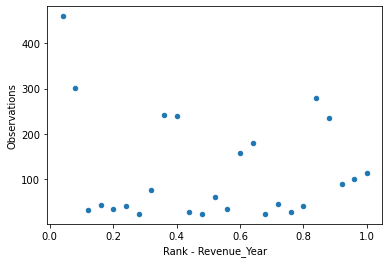

In [99]:
upper_median_dataset2.plot.scatter('Rank - Revenue_Year', 'Observations')

<b><font color='green'>Scatter Plot comparing Los Angeles yearly revenue to yearly number of reviews. There is definitely a strong direct relationship between number of reviews and the revenue earned for the year. </b></font>

<AxesSubplot:xlabel='Rank - Revenue_Year', ylabel='number_of_reviews_ltm'>

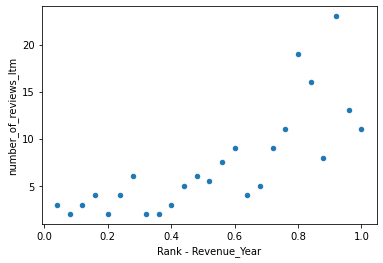

In [113]:
upper_median_dataset2.plot.scatter('Rank - Revenue_Year', 'number_of_reviews_ltm')

<b><font color='blue'>Scatter Plot comparing Los Angeles yearly revenue to price. There is a weaker relationship between price and revenue earned.  There is a slight upward trend however a lot of residuals present. </b></font>

<AxesSubplot:xlabel='Rank - Revenue_Year', ylabel='price'>

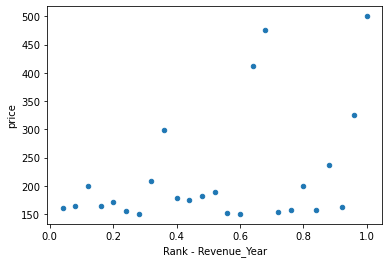

In [101]:
upper_median_dataset2.plot.scatter('Rank - Revenue_Year', 'price')

<b>Export Los Angeles Upper Median Dataset as CSV for Tableau</b>

In [102]:
upper_median_dataset2.to_excel(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\upper_median_dataset2.xlsx', 
                          index=False)

<b>Export San Diego Upper Median Dataset as CSV for Tableau</b>

In [103]:
upper_median_dataset.to_excel(r'C:\Users\Timothy\Desktop\Springboard\Assignments\Unit 16\Python to Excel\New Dataset\upper_median_dataset.xlsx', 
                          index=False)

<b>Heatmap of Los Angeles - Entire Home upper median merged dataset</b>

<AxesSubplot:>

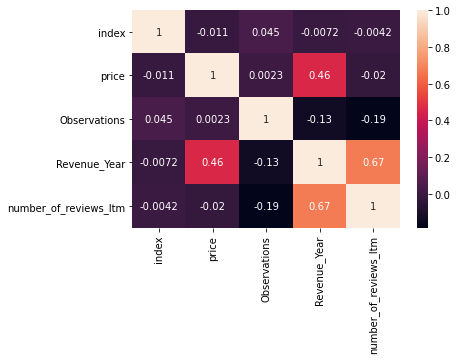

In [104]:
correlated_dataframe = final_merge_LA_entirehome.corr()
sns.heatmap(correlated_dataframe, annot=True)

<b>Heatmap of San Diego - Entire Home upper median merged dataset</b>

<AxesSubplot:>

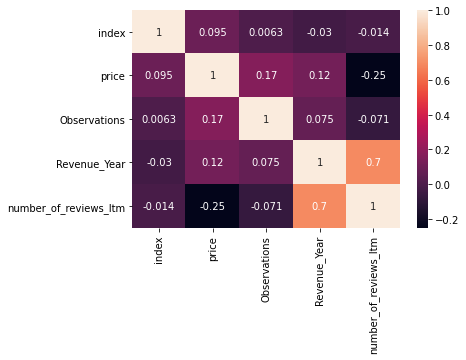

In [105]:
correlated_dataframe = final_merge_SD_entirehome.corr()
sns.heatmap(correlated_dataframe, annot=True)

In [106]:
numerical_columns = under1000_dataframe.select_dtypes(include = ('int64', 'float')).columns
numerical_columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_location', 'calculated_host_listings_count',
       'reviews_per_month', 'Revenue_Year'],
      dtype='object')

In [107]:
numerical_columns_df = under1000_dataframe[['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_location', 'calculated_host_listings_count',
       'reviews_per_month', 'Revenue_Year']]

<b>Heatmap of all Numerical Columns in Entire Dataset of all rentals under $1000.<b>

<AxesSubplot:>

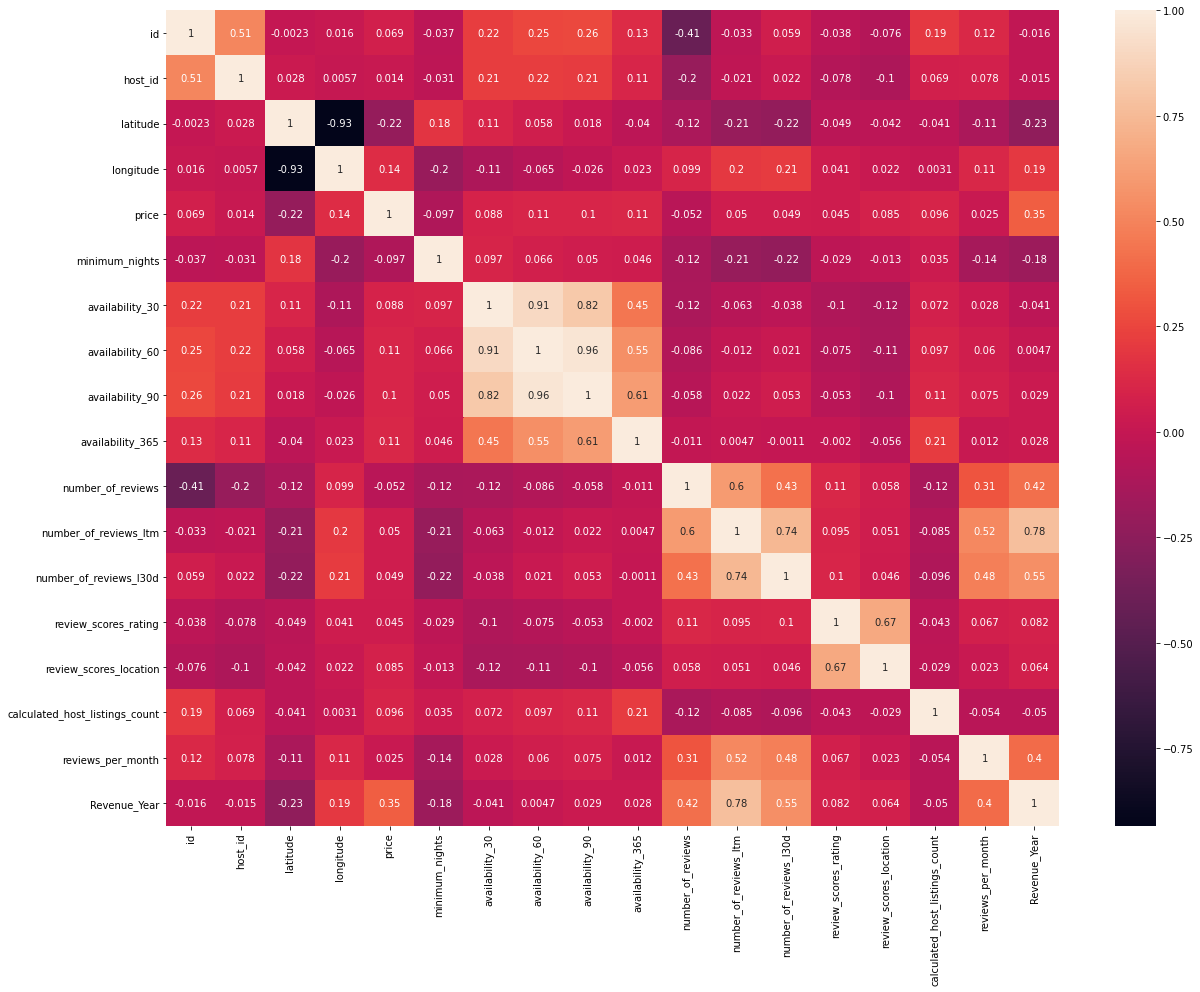

In [108]:
correlated_dataframe = numerical_columns_df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlated_dataframe, annot=True)